# **Data Analysis Cycle**

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/All-About-Machine-Learning/blob/main/Practice2-3_DataAnalysis_SupervisedClassification_KK.ipynb)

<center><img src='Image/Advanced/DataAnalysis_Cycle0.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle1.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle2.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle3.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle4.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle5.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle6.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle7.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle8.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle9.png' width='800'></center>

# **Import Library:** 분석에 사용할 모듈 설치

In [1]:
!pip install --upgrade pip
!python -m pip install --user --upgrade pip

In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn import metrics
# for classification
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# **Data Loading:** 분석에 사용할 데이터 불러오기

In [3]:
# 타이타닉 생존자 데이터 로딩
# statsmodels 로딩
# statsmodels 사용하여 데이터정보 불러오기
# 데이터정보 내 데이터설명과 데이터프레임 출력하기
import statsmodels.api as sm
raw = sm.datasets.get_rdataset("Titanic", package="datasets")
print(raw.__doc__)
print(raw.keys())
print(raw.data.shape)

.. container::

   .. container::

      ======= ===============
      Titanic R Documentation
      ======= ===============

      .. rubric:: Survival of passengers on the Titanic
         :name: survival-of-passengers-on-the-titanic

      .. rubric:: Description
         :name: description

      This data set provides information on the fate of passengers on
      the fatal maiden voyage of the ocean liner ‘Titanic’, summarized
      according to economic status (class), sex, age and survival.

      .. rubric:: Usage
         :name: usage

      .. code:: R

         Titanic

      .. rubric:: Format
         :name: format

      A 4-dimensional array resulting from cross-tabulating 2201
      observations on 4 variables. The variables and their levels are as
      follows:

      == ============ ===================
      No Name         Levels
      1  ``Class``    1st, 2nd, 3rd, Crew
      2  ``Sex``      Male, Female
      3  ``Age``      Child, Adult
      4  ``Survived`` No,

In [4]:
# 데이터 출력
raw.data

,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0
...,...,...,...,...,...
27,Crew,Male,Adult,Yes,192
28,1st,Female,Adult,Yes,140
29,2nd,Female,Adult,Yes,80
30,3rd,Female,Adult,Yes,76


In [5]:
# PC에 저장된 데이터의 위치 확인
# 파이썬이 데이터 위치를 확인할 수 있게 코드로 변환
# pandas 사용하여 데이터 불러오기
# 불러온 데이터 이름은 통상 dataframe의 약자인 df로 사용하는 편
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


|     **변수**     |                           **설명**                          |
|:------------:|:-------------------------------------------------------:|
| **PassengerId**  |                        승객 번호                        |
|   **Survived**   |                 생존여부(1:생존, 0:사망)                |
|    **Pclass**    |           승선권 클래스(1:1st, 2:2nd, 3:3rd)            |
|     **Name**     |                        승객 이름                        |
|     **Sex**      |                        승객 성별                        |
|     **Age**      |                        승객 나이                        |
|    **SibSp**     |                동반한 형제자매, 배우자 수               |
|    **Patch**     |                   동반한 부모, 자식 수                  |
|    **Ticket**    |                     티켓의 고유 넘버                    |
|     **Fare**     |                       티켓의 요금                       |
|    **Cabin**     |                        객실 번호                        |
|   **Embarked**   | 승선한 항구명(C:Cherbourg, Q:Queenstown, S:Southampton) |

In [6]:
# # 데이터 불러오기 실행(방법1)
# # 아래 코드 실행 후 파일 선택을 눌러서
# # 'Titanic.csv' 파일을 선택해주면 로딩 완료
# from google.colab import files
# files.upload()

# # 아래 코드 실행 시 'Titanic.csv' 데이터 출력 가능
# import pandas as pd
# df = pd.read_csv('Titanic.csv')
# df

# **Preprocessing:** 데이터 정리 및 패턴 추출하기

## 자료형 변환

- **목표:** 각 `변수의 특성을 확인`하고 `범주형`과 `연속형`에 맞도록 `변경`

<center><img src='Image/Advanced/Basic_DataType.PNG' width='1000'></center>

- **사람의 데이터 분류:**

> - **데이터 관계에 따라**: `Y = f(X)` 
>
> | **대분류** | **의미/예시** |
|:---:|:---:|
| **독립변수(Independent Variable)** | 다른 변수에 영향을 미치는 변수 (X) |
| **종속변수(Dependent Variable)** | 다른 변수에 의해 영향을 받는 변수 (Y) |
>
> - **데이터 특성에 따라**:
>
> | **대분류** | **소분류** | **의미/예시** |
|:---:|:---:|:---:|
| **질적변수(Qualitative Variable)** | **-** | 내부 값이 특정 범주(Category)로 분류된 변수(색상,성별,종교) |
|  | **명목형 변수(Nominal Variable)** | 값이 순위가 존재하지 않는 경우(혈액형) |
|  | **순위형 변수(Ordinal Variable)** | 값이 순위가 존재하는 경우(성적) |
| **양적변수(Quantitative Variable)** | **-** | 내부 값이 다양한 숫자 분포로 구성된 변수(키,몸무게,소득) |
|  | **이산형 변수(Discrete Variable)** | 값이 셀수 있는 경우(정수) |
|  | **연속형 변수(Continuous Variable)** | 값이 셀수 없는 경우(실수) |

- **컴퓨터의 데이터 분류:**

| **대분류** | **소분류** | **컴퓨터의 분류1** | **컴퓨터의 분류2** |
|:---:|:---:|:---:|:---:|
| **질적변수(Qualitative Variable)** | **-** | - | 범주형 |
|  | **명목형 변수(Nominal Variable)** | 문자 | 범주형 |
|  | **순위형 변수(Ordinal Variable)** | 숫자 | 범주형 |
| **양적변수(Quantitative Variable)** | **-** | - | 연속형 |
|  | **이산형 변수(Discrete Variable)** | 숫자 | 연속형 |
|  | **연속형 변수(Continuous Variable)** | 숫자 | 연속형 |

---
---

| **변수** | **설명** |
|:---:|:---:|
| **Price** | 주택 가격 |
| **CRIM** | 1인당 범죄 발생률 |
| **ZN** | 주택용 토지의 비율 |
| **INDUS** | 비소매 상업지역 비율 |
| **CHAS** | 찰스강 인접 여부(인접=1) |
| **NOX** | 일산화질소 농도 |
| **RM** | 방의 개수 |
| **AGE** | 1940년 이전에 건축된 주택 비율 |
| **DIS** | 주요 5대 회사와의 거리 |
| **RAD** | 고속도로 접근성 |
| **TAX** | 재산세 |
| **PTRATIO** | 교사와 학생의 비율 |
| **B** | 흑인 거주 비율 |
| **LSTAT** | 저소득층 비율 |

In [7]:
# 데이터의 각 column의 타입을 확인하기
# df.shape
# df.ndim
# df.head()
# df.tail()
# df.describe(include='all').T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측값 처리

---

<center><img src='Image/Advanced/Pandas_DataFrameStructure.png' width='700'>(https://www.geeksforgeeks.org/creating-a-pandas-dataframe/)</center>

- **목표:** 결측값이란 `값이 비어있는 것(NaN)`을 의미하며, `알고리즘 작동을 어렵게` 하고 작동이 되어도 `해석의 왜곡` 가능성 존재하기 때문에 `처리 필요`

> - **삭제:** 결측값이 발생한 모든 변수(Column)를 삭제하거나 일부(Row)를 삭제
>
>```python
>df.dropna(axis=0)    # 행 삭제
>df.dropna(axis=1)    # 열 삭제
>```
> - **대체:** 결측값을 제외한 값들의 `통계량으로 결측값을 대체`
>> - 중심 통계량
>> - 분포 기반 랜던 추출
>>
>>```python
>>df.fillna(df.mean())    # 평균치로 대체
>>df.fillna(df.median())    # 중앙값으로 대체
>>df.fillna(df.mode())    # 최빈값으로 대체
>>```
> - **예측:** 별도 분석을 통해 `결측값을 예측`하여 삽입
>> - Interpolation
>> - Regression Imputation
>> - EM Algorithm
>>
>>```python
>>df.interpolate(method='linear')    # 선형방식으로 삽입
>>df.interpolate(method='time')    # 인덱스 날짜고려 선형방식으로 삽입
>>df.interpolate(method='spline')    # 비선형방식으로 삽입
>>df.interpolate(method='polynomial')    # 비선형 다항식으로 삽입
>>```
>
> | **결측치 비율** | **처리 방향** |
|:---:|:---:|
| **10% 미만** | 삭제 또는 통계량기반 대체 |
| **10% ~ 30%** | 모델링기반 예측 |
| **30% 이상** | 변수의 완전성/신뢰성 문제로 삭제 |
<center>(Hair et al., 2016)</center>

In [8]:
# 데이터의 각 값이 비어있는지 확인하기
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# 데이터의 각 column에서 비어있는 값의 갯수 확인하기
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# 결측값을 눈으로 확인하기 위한 모듈 설치하기
!pip install missingno

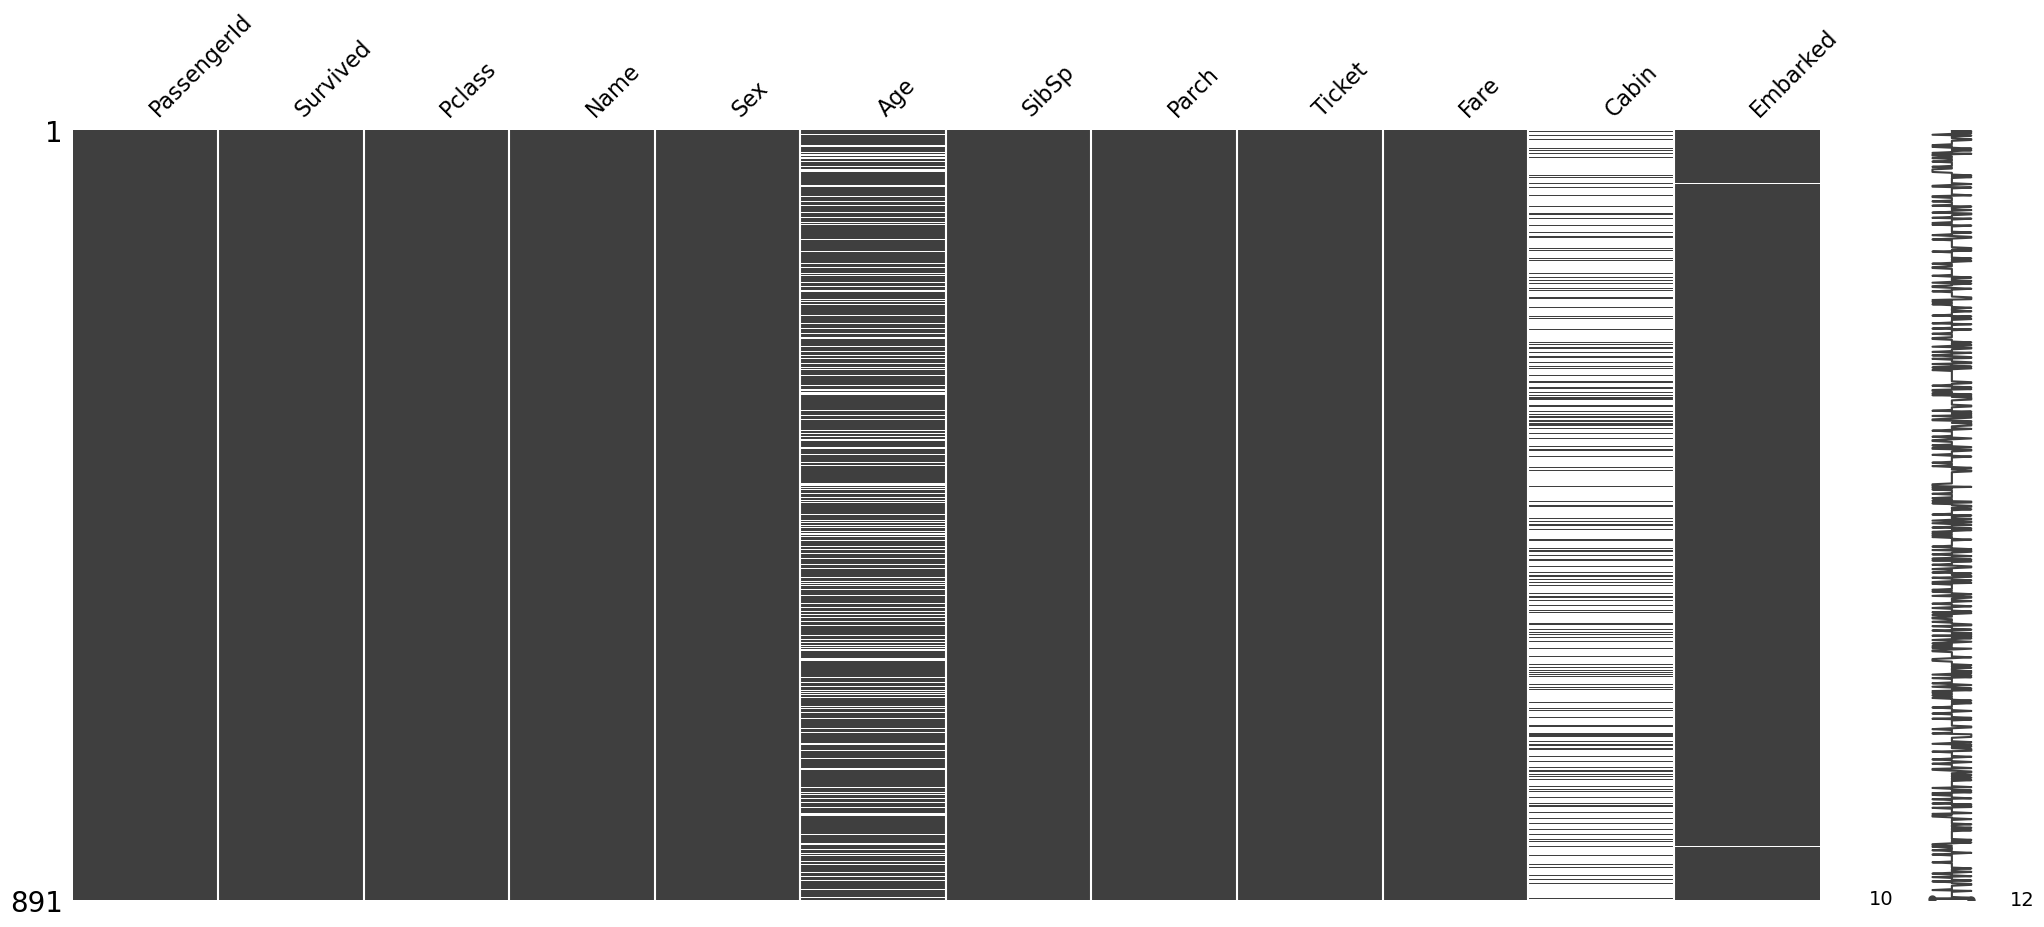

In [11]:
# missingno 모듈 사용하여 결측값의 위치를 확인하기
import missingno as msno

msno.matrix(df)
plt.show()

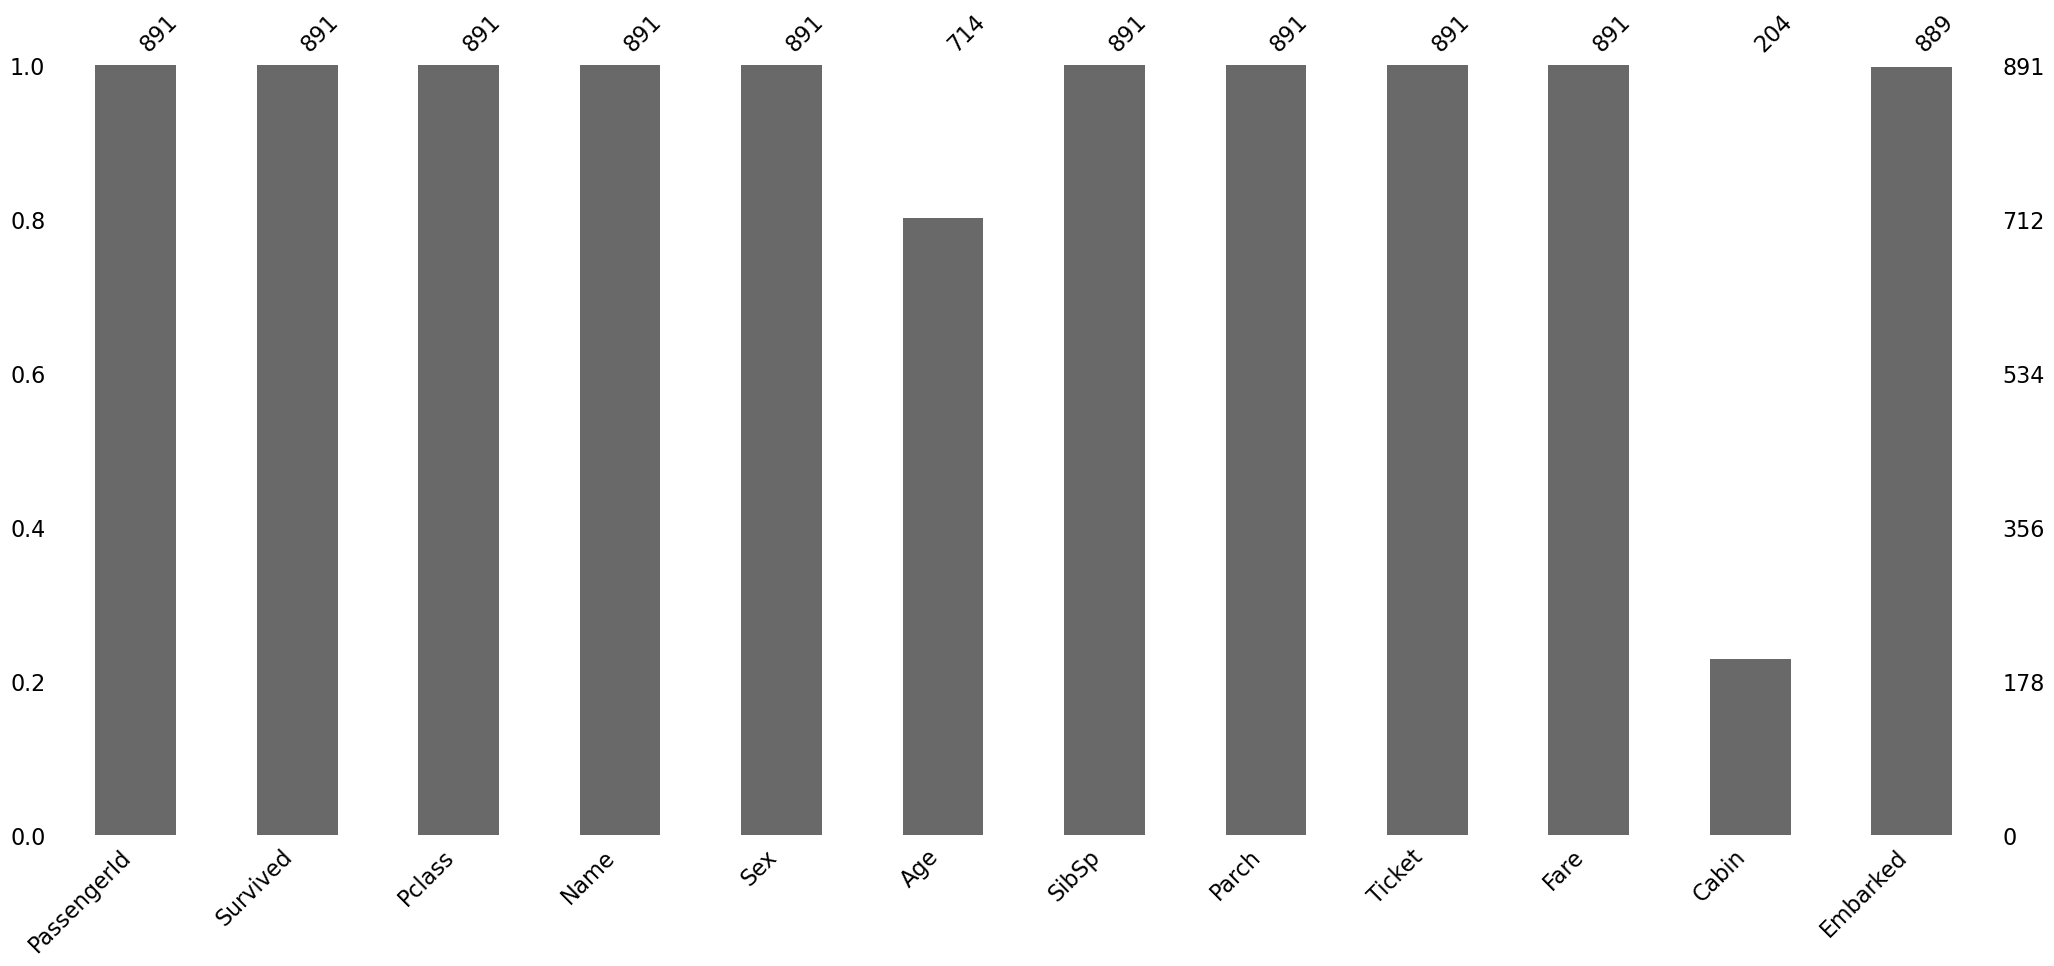

In [12]:
# missingno 모듈 사용하여 결측값의 갯수 확인하기
msno.bar(df)
plt.show()

- `Age, Cabin, Embarked` 결측값 처리 필요

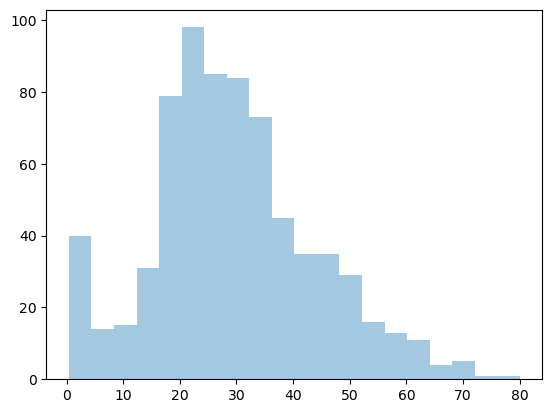

In [13]:
# Age 분포 확인
sns.distplot(df[['Age']], kde=False)
plt.show()

In [14]:
# 정규분포와 유사해서 평균으로 결측치 처리해도 괜찮을 듯
df[['Age']].fillna(df.Age.mean(), axis=1).isnull().sum()

Age    0
dtype: int64

['male' 'female']


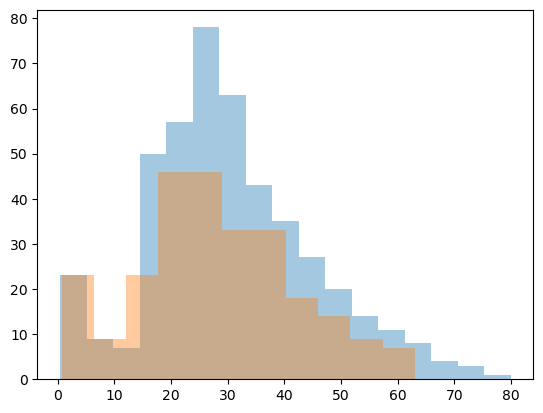

In [15]:
# 성별로 Age 분포의 차이가 있나 확인
# 성별의 unique 값 확인
# 성별로 DataFrame 분리
# 각 데이터 별로 분포 확인
print(df.Sex.unique())
df_agem = df[df.Sex == 'male']
df_agefm = df[df.Sex == 'female']
sns.distplot(df_agem[['Age']], kde=False)
sns.distplot(df_agefm[['Age']], kde=False)
plt.show()

In [16]:
# 성별에 따른 Age 평균이 다르기 때문에 각각 결측치 처리
df_agem = df_agem[['Age']].fillna(df_agem[['Age']].mean())
df_agefm = df_agefm[['Age']].fillna(df_agefm[['Age']].mean())

In [17]:
# 결측치 처리 결과 확인
display(df_agem, df_agefm)

,Age
0,22.00
4,35.00
5,30.73
6,54.00
7,2.00
...,...
883,28.00
884,25.00
886,27.00
889,26.00


,Age
1,38.00
2,26.00
3,35.00
8,27.00
9,14.00
...,...
880,25.00
882,22.00
885,39.00
887,19.00


In [18]:
# 남녀 각각 결측치 처리한 결과를 합해서 기존 Age 변수로 대체
df[['Age']] = pd.concat([df_agem, df_agefm], axis=0).sort_index()

In [19]:
# Age 결측치 제거 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# Embarked는 범주형이라 분포 보다는 unique 값 확인
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
# 최빈값으로 결측값 제거시 효과 확인
df[['Embarked']].fillna(df['Embarked'].mode()[0], axis=0).isnull().sum()

Embarked    0
dtype: int64

In [22]:
# 최빈값으로 결측값 제거 후 기존 값 대체
df[['Embarked']] = df[['Embarked']].fillna(df['Embarked'].mode()[0], axis=0)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [23]:
# 유일하게 결측치가 많은 Cabin 만 삭제 삭제도 가능
df.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.92,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C


In [24]:
# 다른 방식을 위해 unique 값 확인
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [25]:
# Cabin 값들을 문자로 바꾸고 제일 앞글자만 남기고 기존값 대체
# unique 값 재확인
df['Cabin'] = df['Cabin'].str.slice(0,1)
df['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [26]:
# nan 값은 Temp 로 대체
df['Cabin'] = df['Cabin'].fillna('Temp')
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

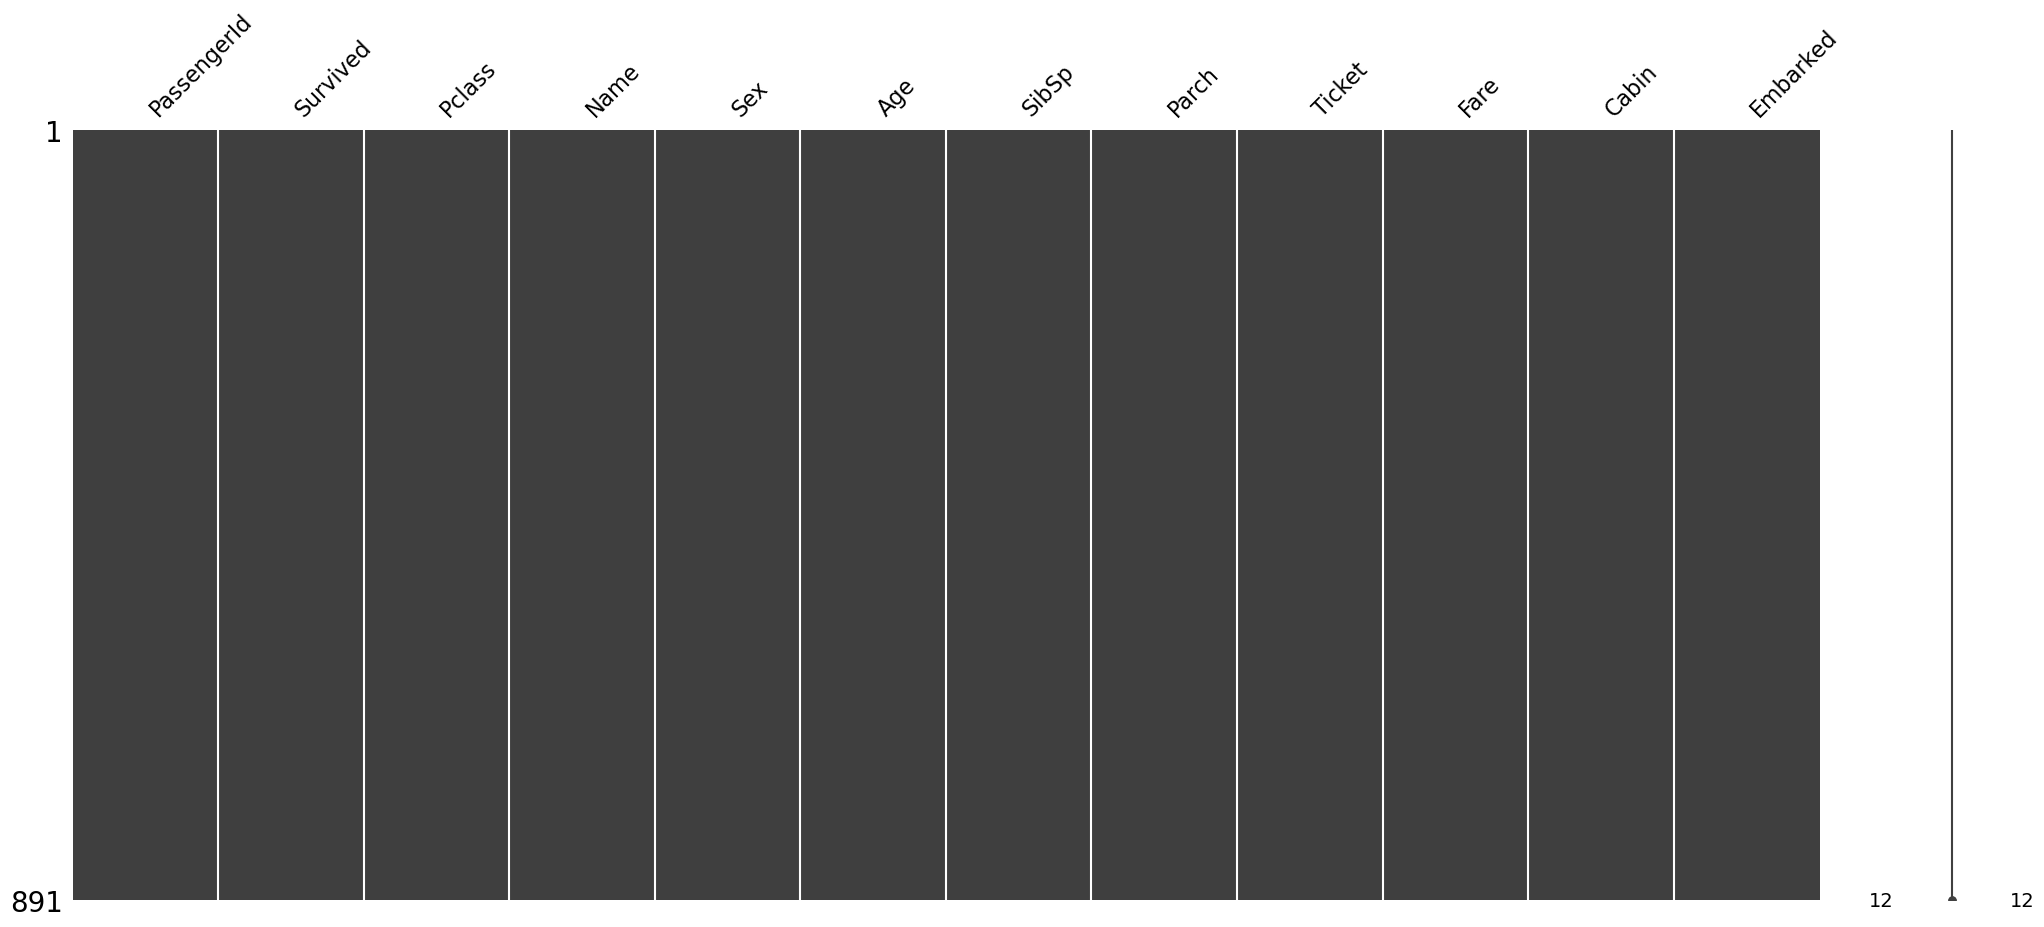

In [27]:
# missingno 모듈 사용하여 결측값의 위치를 확인하기
msno.matrix(df)
plt.show()

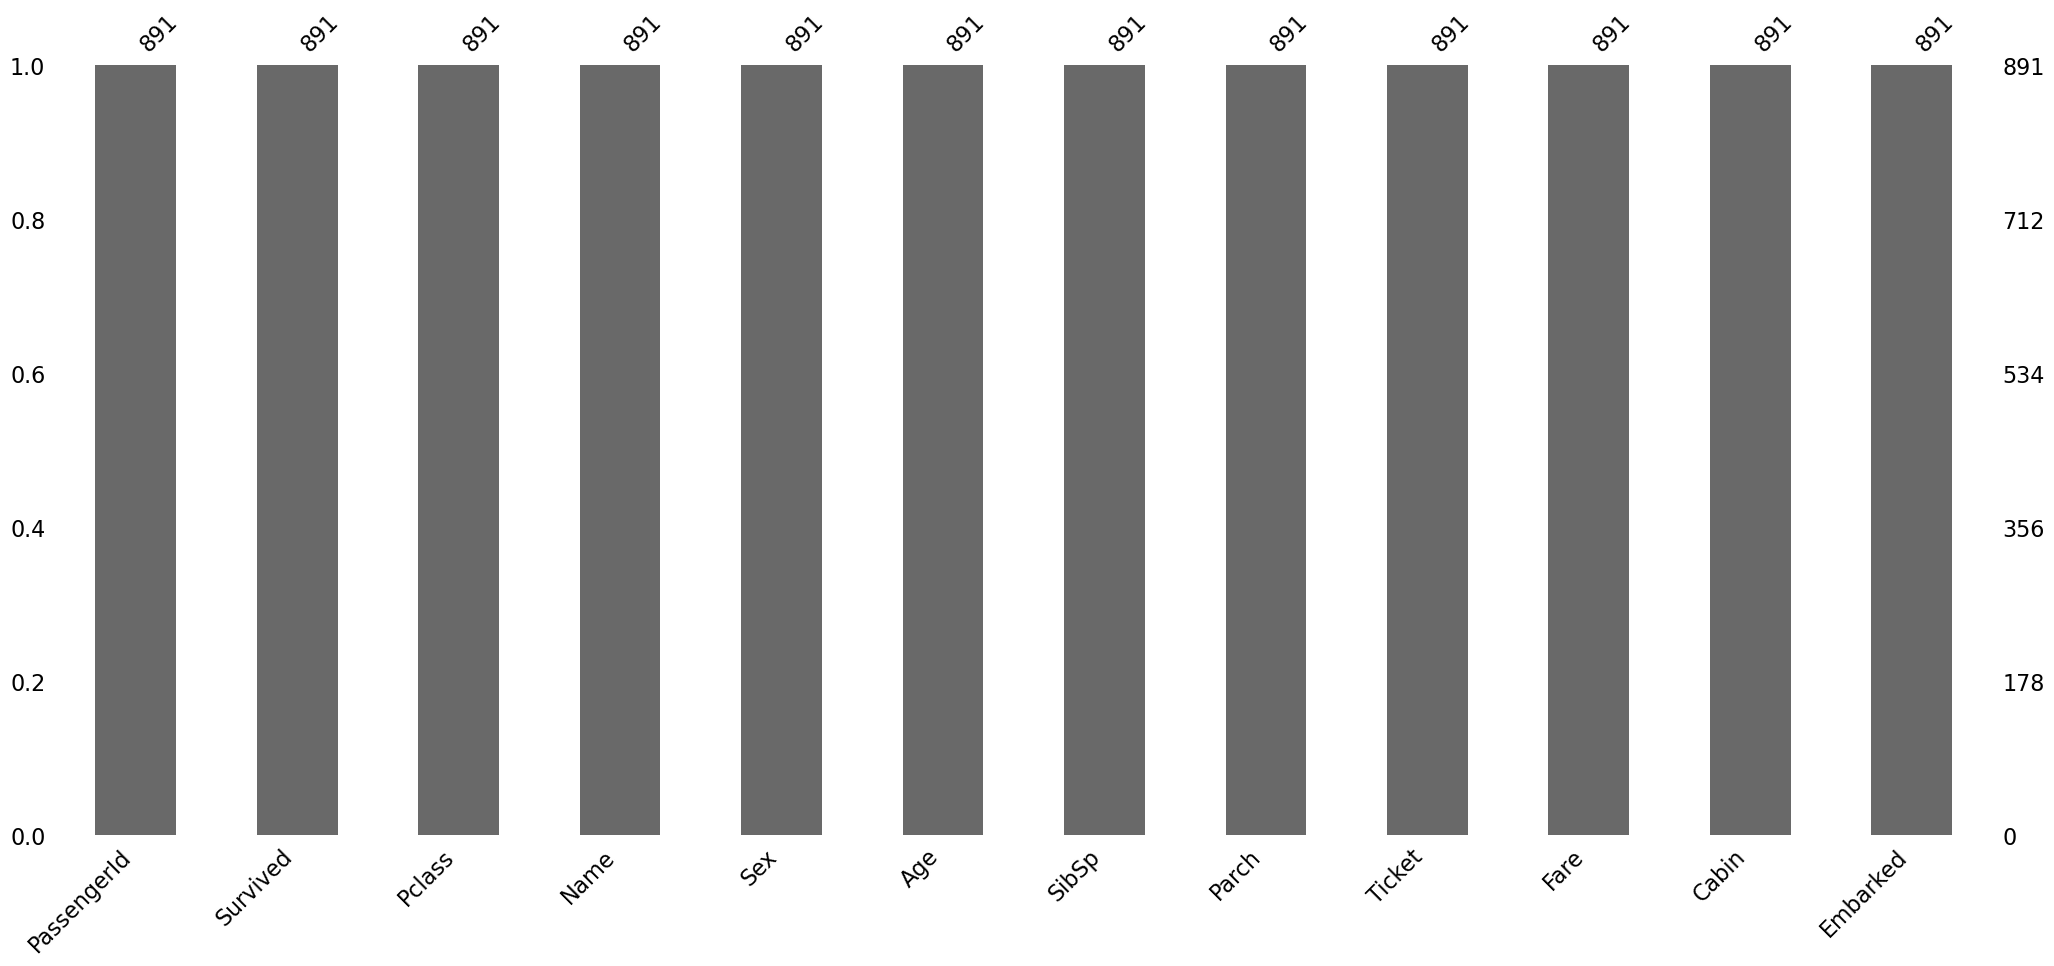

In [28]:
# missingno 모듈 사용하여 결측값의 갯수 확인하기
msno.bar(df)
plt.show()

### Code Summary

In [29]:
# 결측값 처리
def fillnull(df):
    ## Age
    df_agem = df[df.Sex == 'male']
    df_agem = df_agem[['Age']].fillna(df_agem[['Age']].mean())

    df_agefm = df[df.Sex == 'female']
    df_agefm = df_agefm[['Age']].fillna(df_agefm[['Age']].mean())
    df[['Age']] = pd.concat([df_agem, df_agefm], axis=0).sort_index()

    ## Embarked
    df[['Embarked']] = df[['Embarked']].fillna(df['Embarked'].mode()[0], axis=0)

    ## Cabin
    df['Cabin'] = df['Cabin'].str.slice(0,1)
    df['Cabin'] = df['Cabin'].fillna('Temp')
    
    return df

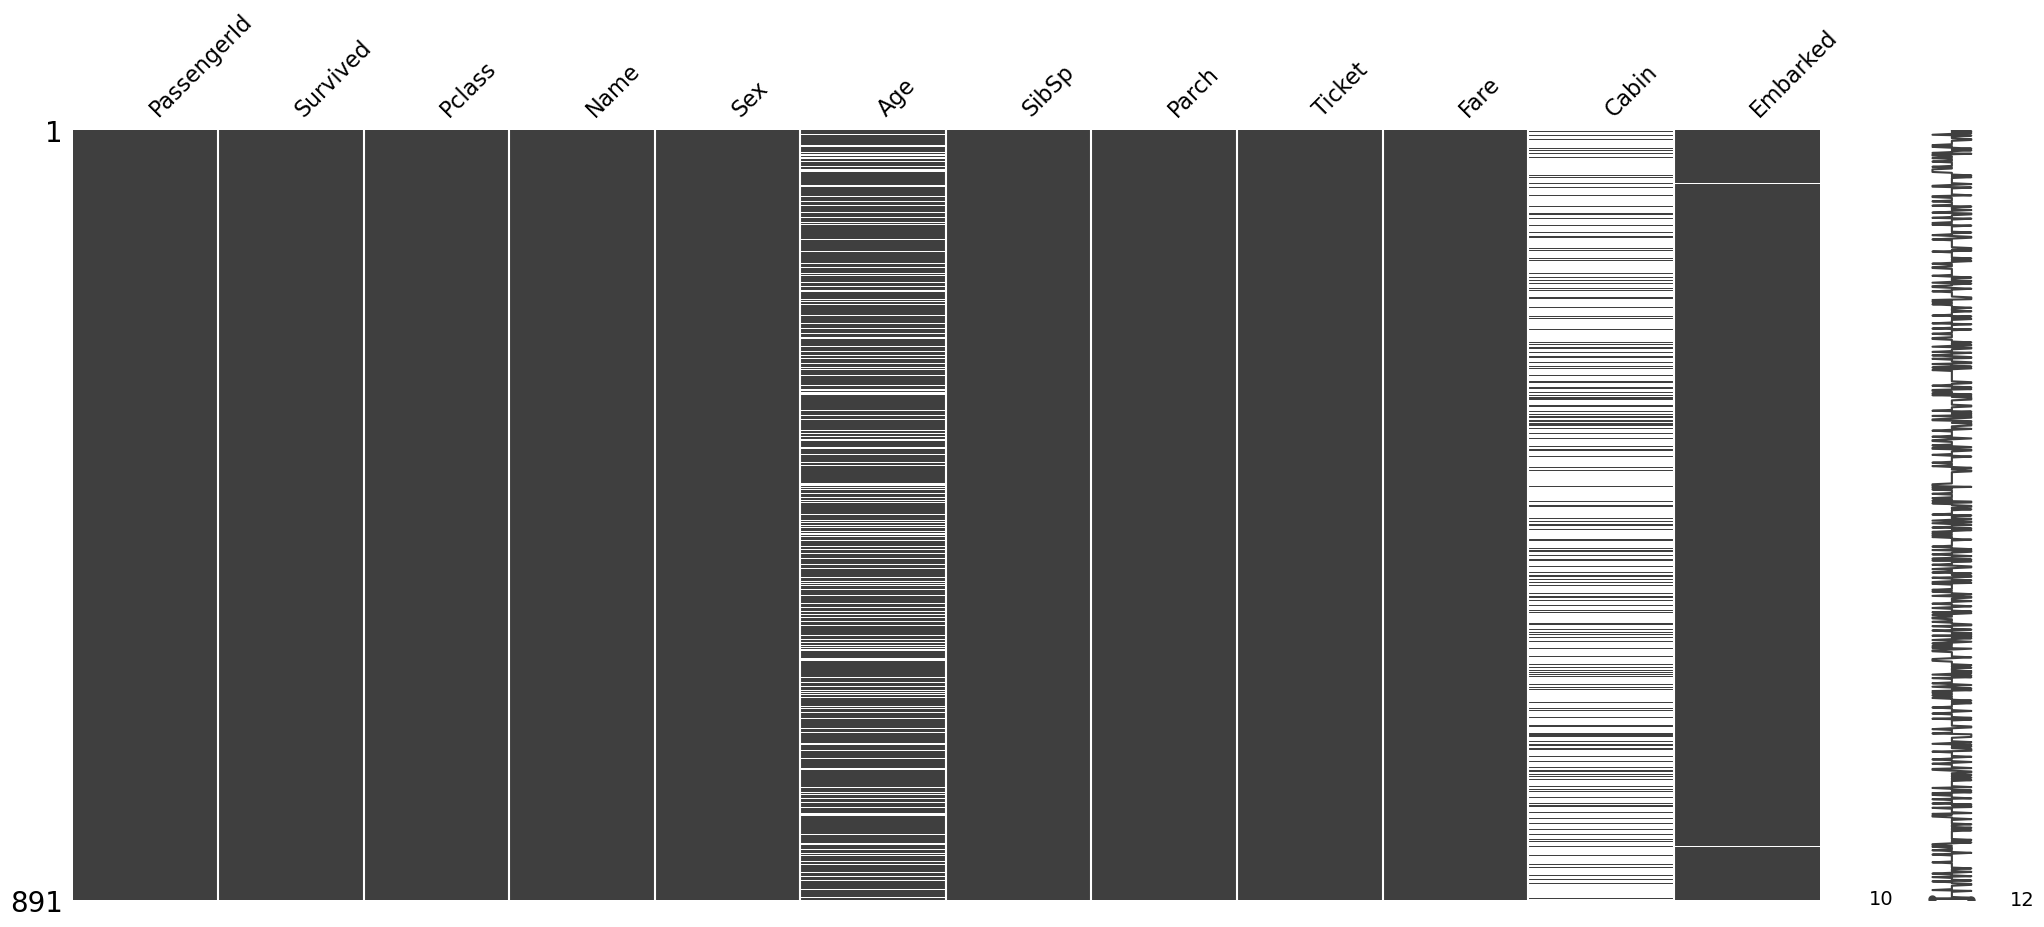

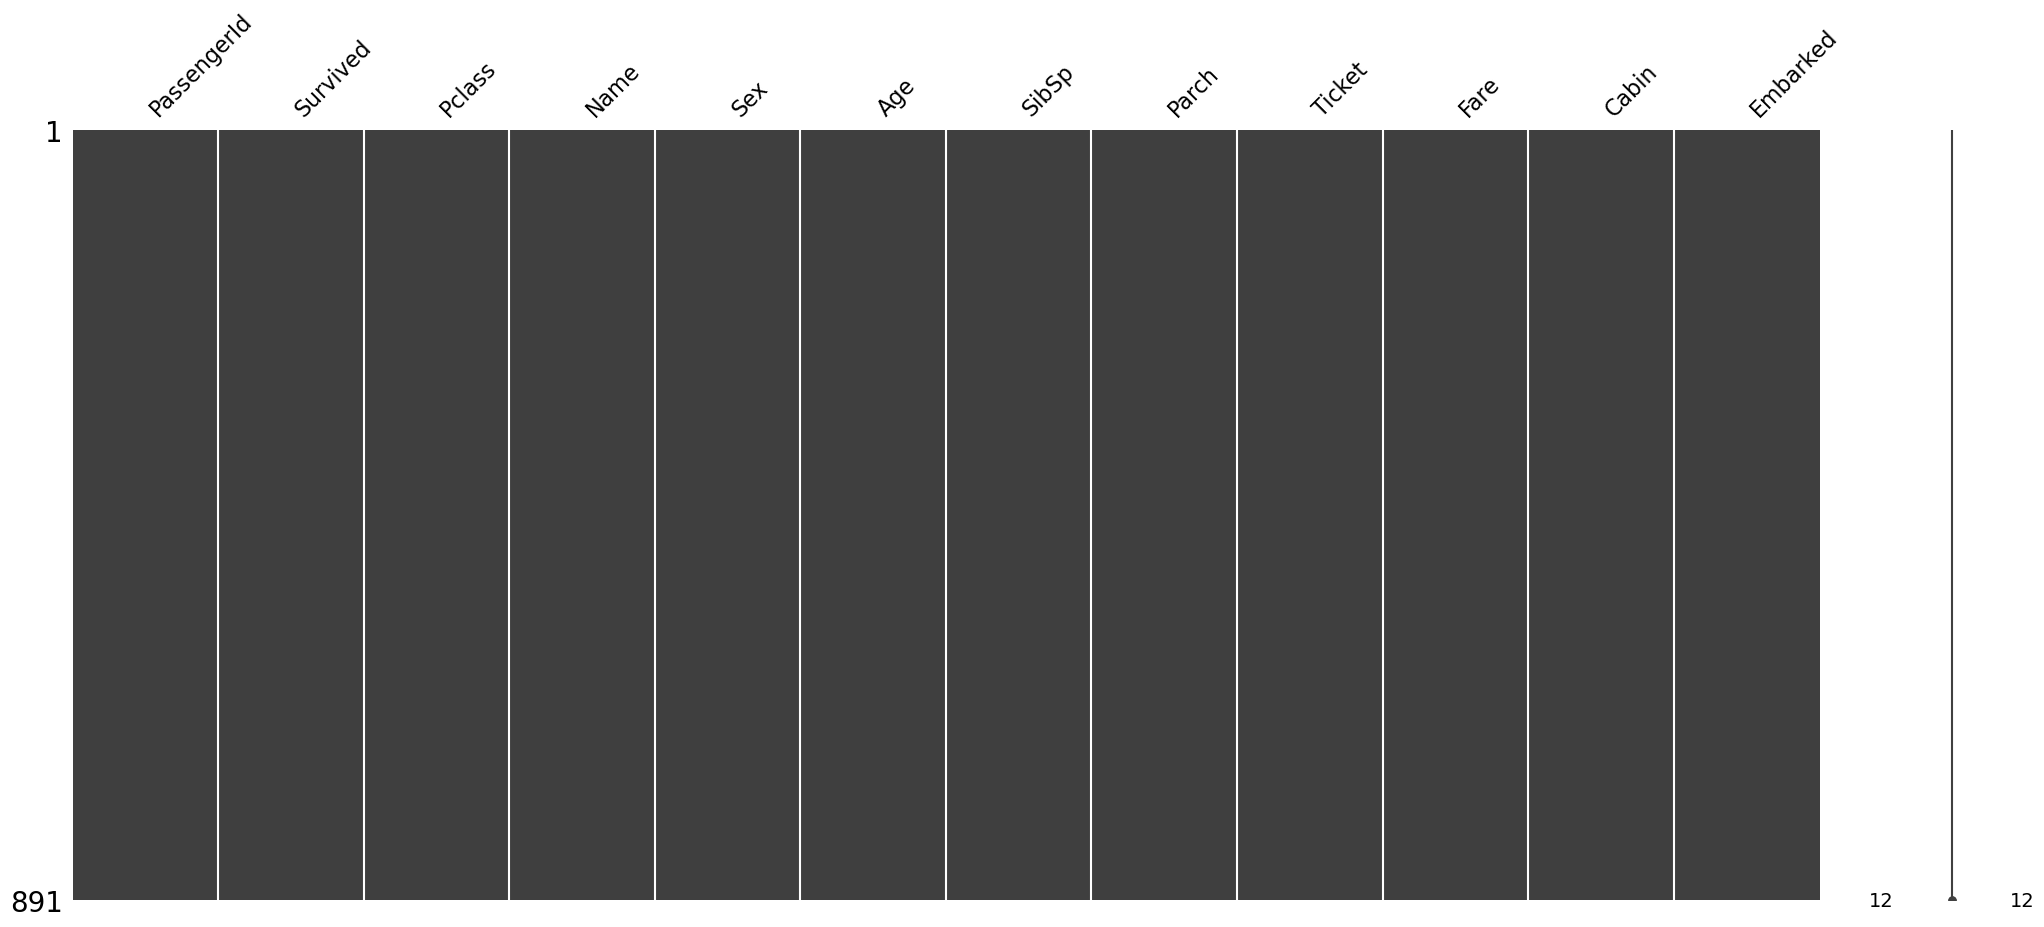

In [30]:
# 결측치 정보를 missingno 함수를 사용하여 확인하기
# 위 함수를 사용하여 결측치를 처리하기
# 결측치 처리 후 missingno 함수를 사용하여 변화 확인하기

import missingno as msno
import matplotlib.pyplot as plt

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 결측치 처리 전
msno.matrix(df)
plt.show()

# 결측치 처리 후
df = fillnull(df)
msno.matrix(df)
plt.show()

In [31]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 결측치 처리하기
df = fillnull(df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,Temp,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,Temp,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,Temp,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,Temp,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.92,1,2,W./C. 6607,23.45,Temp,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C,C


## 데이터 정리

- `Name, Ticket` 문자열에서 정보 추출

In [32]:
# Name unique 값 확인하여 정보추출 준비
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [33]:
# Name 값을 문자로 변경
# 콤마를 기준으로 분리하여 DataFrame으로 변환
# 첫번째 column만 출력하여 이름을 모두 제거
df['Name'].str.split(',', expand=True)[1]

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: 1, Length: 891, dtype: object

In [34]:
# 남은 성을 새로운 name_sub로 저장
name_sub = df['Name'].str.split(',', expand=True)[1]
name_sub

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: 1, Length: 891, dtype: object

In [35]:
# 마찬가지의 방식으로 성도 제거하고 호칭만 확인
name_sub.str.split('. ', expand=True)[0].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt', ' th',
       ' Jonkheer'], dtype=object)

In [36]:
# 각 호칭별로 새로운 직군으로 Clustering
name_sub = name_sub.str.split('. ', expand=True)[0]
name_sub.replace([' Mr'], 'Mr', inplace=True)
name_sub.replace([' Mrs'], 'Mrs', inplace=True)
name_sub.replace([' Ms', ' Miss'], 'Miss', inplace=True)
name_sub.replace([' Don', ' Mme', ' Lady', 'Sir', 'Mlle', ' th', ' Jonkheer'], 'Noble', inplace=True)
name_sub.replace([' Master', ' Major', ' Col', ' Capt', ' Sir', ' Mlle'], 'Officer', inplace=True)
name_sub.replace([' Dr', ' Rev'], 'Priest', inplace=True)
name_sub.unique()

array(['Mr', 'Mrs', 'Miss', 'Officer', 'Noble', 'Priest'], dtype=object)

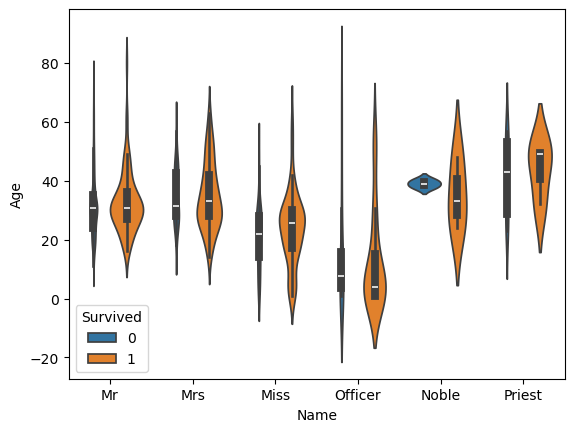

In [37]:
# 최종 변환된 호칭직군으로 기존 Name 변수 대체
# violin plot으로 각 호칭직군에 따른 나이 분포 확인
df['Name'] = name_sub.copy()
sns.violinplot(x='Name', y='Age', hue='Survived', data=df)
plt.show()

In [38]:
# Ticket unique 값 확인하여 정보 추출 준비
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [39]:
# 값들의 .제거 + /제거
# 앞뒤공백제거 + 가운데공백으로 분리하여 기존 값 대체
# unique 값 확인
df['Ticket'] = df['Ticket'].str.replace('.','').str.replace('/','')
df['Ticket'] = df['Ticket'].str.strip().str.split(' ').str[0]
df['Ticket'].unique()

array(['A5', 'PC', 'STONO2', '113803', '373450', '330877', '17463',
       '349909', '347742', '237736', 'PP', '113783', '347082', '350406',
       '248706', '382652', '244373', '345763', '2649', '239865', '248698',
       '330923', '113788', '347077', '2631', '19950', '330959', '349216',
       '335677', 'CA', '113789', '2677', '345764', '2651', '7546',
       '11668', '349253', 'SCParis', '330958', 'SCA4', '370371', '14311',
       '2662', '349237', '3101295', 'A4', '2926', '113509', '19947',
       '2697', '2669', '113572', '36973', '347088', '2661', 'SP',
       '3101281', '315151', 'SOC', '2680', '1601', '348123', '349208',
       '374746', '248738', '364516', '345767', '345779', '330932',
       '113059', '3101278', 'WC', 'SOTONOQ', '343275', '343276', '347466',
       'WEP', '364500', '374910', '231919', '244367', '349245', '349215',
       '35281', '7540', '3101276', '349207', '343120', '312991', '349249',
       '371110', '110465', '2665', '324669', '4136', '2627', 'STONO',
  

In [40]:
# 숫자값은 문자열 NUM으로 대체
df.loc[df['Ticket'].str.isdigit(), 'Ticket'] = 'NUM'
df['Ticket'].unique()

array(['A5', 'PC', 'STONO2', 'NUM', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON'], dtype=object)

In [41]:
# 각 Ticker 문자에 따른 생존여부 비율 확인
for i in df['Ticket'].unique():
    print('\n', i)
    df_sub = df[df['Ticket'] == i]
    print(df_sub[['Survived']].value_counts())


 A5
Survived
0           19
1            2
Name: count, dtype: int64

 PC
Survived
1           39
0           21
Name: count, dtype: int64

 STONO2
Survived
0           3
1           3
Name: count, dtype: int64

 NUM
Survived
0           407
1           254
Name: count, dtype: int64

 PP
Survived
1           2
0           1
Name: count, dtype: int64

 CA
Survived
0           27
1           14
Name: count, dtype: int64

 SCParis
Survived
0           2
1           2
Name: count, dtype: int64

 SCA4
Survived
0           1
Name: count, dtype: int64

 A4
Survived
0           7
Name: count, dtype: int64

 SP
Survived
0           1
Name: count, dtype: int64

 SOC
Survived
0           5
1           1
Name: count, dtype: int64

 WC
Survived
0           9
1           1
Name: count, dtype: int64

 SOTONOQ
Survived
0           13
1            2
Name: count, dtype: int64

 WEP
Survived
0           2
1           1
Name: count, dtype: int64

 STONO
Survived
0           7
1           5
Name: count, d

In [42]:
# Age 기초통계 확인
display(df['Age'].describe())

count   891.00
mean     29.74
std      13.01
min       0.42
25%      22.00
50%      30.00
75%      35.00
max      80.00
Name: Age, dtype: float64

In [43]:
# Age를 나이대별로 묶어서 그룹화
age_interval = [10, 20, 30, 40, 50, 60, 70, 80, 90]
if df['Age'].max() > len(age_interval):
    df['Age'] = np.digitize(df['Age'], bins=age_interval)

display(df['Age'].describe())

count   891.00
mean      2.56
std       1.36
min       0.00
25%       2.00
50%       3.00
75%       3.00
max       8.00
Name: Age, dtype: float64

### Code Summary

In [44]:
# 데이터 정리
def prep(df):
    # Name
    name_sub = df['Name'].str.split(',', expand=True)[1]
    name_sub = name_sub.str.split('. ', expand=True)[0]
    name_sub.replace([' Mr'], 'Mr', inplace=True)
    name_sub.replace([' Mrs'], 'Mrs', inplace=True)
    name_sub.replace([' Ms', ' Miss'], 'Miss', inplace=True)
    name_sub.replace([' Don', ' Mme', ' Lady', 'Sir', 'Mlle', ' th', ' Jonkheer'], 'Noble', inplace=True)
    name_sub.replace([' Master', ' Major', ' Col', ' Capt', ' Sir', ' Mlle'], 'Officer', inplace=True)
    name_sub.replace([' Dr', ' Rev'], 'Priest', inplace=True)
    df['Name'] = name_sub.copy()

    # Ticket
    df['Ticket'] = df['Ticket'].str.replace('.','').str.replace('/','')
    df['Ticket'] = df['Ticket'].str.strip().str.split(' ').str[0]
    df.loc[df['Ticket'].str.isdigit(), 'Ticket'] = 'NUM'

    # Age
    age_interval = [10, 20, 30, 40, 50, 60, 70, 80, 90]
    if df['Age'].max() > len(age_interval):
        df['Age'] = np.digitize(df['Age'], bins=age_interval)
        
    return df

In [45]:
# 결측값 처리 후 df 통계량 확인하기
# 위 함수를 사용하여 데이터를 범주화 하기
# 범주화 후 df 통계량 확인하기

# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 결측치 처리하기
df = fillnull(df)

# 데이터 정리 전
display(df.describe(include='all'))

# 데이터 정리 후
df = prep(df)
display(df.describe(include='all'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,891.00,891.00,891.00,891,891.00,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,9,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,Temp,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687,646
mean,446.00,0.38,2.31,NaN,NaN,29.74,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,13.01,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,22.00,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,30.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,35.00,1.00,0.00,NaN,31.00,NaN,NaN


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,891.00,891.00,891.00,891,891.00,891,891
unique,NaN,NaN,NaN,6,2,NaN,NaN,NaN,31,NaN,9,3
top,NaN,NaN,NaN,Mr,male,NaN,NaN,NaN,NUM,NaN,Temp,S
freq,NaN,NaN,NaN,517,577,NaN,NaN,NaN,661,NaN,687,646
mean,446.00,0.38,2.31,NaN,NaN,2.56,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,1.36,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.00,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,2.00,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,3.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,3.00,1.00,0.00,NaN,31.00,NaN,NaN


In [46]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 결측치 처리하기
df = fillnull(df)

# 데이터 범주화 하기
df = prep(df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,2,1,0,A5,7.25,Temp,S
1,2,1,1,Mrs,female,3,1,0,PC,71.28,C,C
2,3,1,3,Miss,female,2,0,0,STONO2,7.92,Temp,S
3,4,1,1,Mrs,female,3,1,0,NUM,53.10,C,S
4,5,0,3,Mr,male,3,0,0,NUM,8.05,Temp,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Priest,male,2,0,0,NUM,13.00,Temp,S
887,888,1,1,Miss,female,1,0,0,NUM,30.00,B,S
888,889,0,3,Miss,female,2,1,2,WC,23.45,Temp,S
889,890,1,1,Mr,male,2,0,0,NUM,30.00,C,C


## 데이터 분리

- **배경:**
> **(1) 독립변수와 종속변수 구분**
> 
> | **대분류** | **의미/예시** |
|:---:|:---:|
| **독립변수(Independent Variable)** | 다른 변수에 영향을 미치는 변수 (X) |
| **종속변수(Dependent Variable)** | 다른 변수에 의해 영향을 받는 변수 (Y) |
>
> **(2) 과거/현재와 미래 기간 구분:** 과거/현재의 상황을 분석하고, 미래를 예측 할 수 있는 환경 구축
> <br>
>
> - **Training Period:** 과거/현재의 상황을 분석
>
> <center><img src='Image/Advanced/DataSplit_Concept1.png' width='700'></center>
> <br>
>
> - **Testing Period:** 미래를 예측 할 수 있는 환경
>
> <center><img src='Image/Advanced/DataSplit_Concept2.png' width='700'></center>

**1) 간단한 방법(Holdout Validation):**

- **훈련셋(Training set):** 일반적으로 `전체 데이터의 70%` 사용 
- **테스트셋(Testing set):** 일반적으로 `전체 데이터의 30%` 사용

**2) 일반적 방법(Simple Validation):**
- **훈련셋(Training set):** 일반적으로 `전체 데이터의 60%`를 사용
- **검증셋(Validation set):** 
> - 개발셋이라고도 하며, 일반적으로 `전체 데이터의 20%`를 사용함
> - `훈련된 여러가지 모델들의 성능을 테스트` 하는데 사용되며 모델 선택의 기준이 됨
- **테스트셋(Testing set):** 일반적으로 `전체 데이터의 20%`를 사용하며 최종 모델의 정확성을 확인하는 목적에 사용됨
<center><img src='Image/Advanced/DataSplit_Simple.png' width='500'></center>


In [47]:
# 종속변수로 사용할 column 이름 지정하기
# 종속변수 column 이름 외 나머지를 모두 독립변수로 지정하기
# 종속변수와 독립변수를 출력하기
Y_colname = ['Survived']
X_colname = [x for x in df.columns if x not in Y_colname]
Y_colname, X_colname

(['Survived'],
 ['PassengerId',
  'Pclass',
  'Name',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked'])

In [48]:
# sklean 패키지 내 mocel_selection 모듈에서 train_test_split 함수를 호출하기
# train_test_split 함수를 사용하여 X_train, X_test, Y_train, Y_test 4개의 집단으로 구분하기
from sklearn.model_selection import train_test_split

train_test_split(df[X_colname], df[Y_colname],
                 test_size=0.2, random_state=123)

[     PassengerId  Pclass  Name     Sex  Age  SibSp  Parch Ticket  Fare Cabin  \
 329          330       1  Miss  female    1      0      1    NUM 57.98     B   
 749          750       3    Mr    male    3      0      0    NUM  7.75  Temp   
 203          204       3    Mr    male    4      0      0    NUM  7.22  Temp   
 421          422       3    Mr    male    2      0      0     A5  7.73  Temp   
 97            98       1    Mr    male    2      0      1     PC 63.36     D   
 ..           ...     ...   ...     ...  ...    ...    ...    ...   ...   ...   
 98            99       2   Mrs  female    3      0      1    NUM 23.00  Temp   
 322          323       2  Miss  female    3      0      0    NUM 12.35  Temp   
 382          383       3    Mr    male    3      0      0  STONO  7.92  Temp   
 365          366       3    Mr    male    3      0      0      C  7.25  Temp   
 510          511       3    Mr    male    2      0      0    NUM  7.75  Temp   
 
     Embarked  
 329      

In [49]:
# train_test_split 함수를 사용하여 X_train, X_test, Y_train, Y_test 4개의 집단으로 구분하기
X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                    test_size=0.2, random_state=123)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(712, 11) (712, 1)
(179, 11) (179, 1)


In [50]:
# 미래 예측 값인 X_test, Y_test를 출력하기
display(X_test, Y_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,3,Miss,female,0,1,1,NUM,11.13,Temp,S
524,525,3,Mr,male,3,0,0,NUM,7.23,Temp,C
452,453,1,Mr,male,3,0,0,NUM,27.75,C,C
170,171,1,Mr,male,6,0,0,NUM,33.50,B,S
620,621,3,Mr,male,2,1,0,NUM,14.45,Temp,C
...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,Mr,male,3,0,0,NUM,7.73,Temp,Q
338,339,3,Mr,male,4,0,0,NUM,8.05,Temp,S
827,828,2,Officer,male,0,0,2,SCPARIS,37.00,Temp,C
773,774,3,Mr,male,3,0,0,NUM,7.22,Temp,C


,Survived
172,1
524,0
452,0
170,0
620,0
...,...
388,0
338,1
827,1
773,0


### Code Summary

In [51]:
# 데이터 분리
def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [52]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 결측치 처리하기
df = fillnull(df)

# 데이터 범주화 하기
df = prep(df)

# 종속변수로 사용할 컬림 이름 선택하기
# 데이터를 X_train, X_test, Y_train, Y_test로 분리하기
Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)
display(X_test, Y_test)

(712, 11) (712, 1)
(179, 11) (179, 1)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,3,Miss,female,0,1,1,NUM,11.13,Temp,S
524,525,3,Mr,male,3,0,0,NUM,7.23,Temp,C
452,453,1,Mr,male,3,0,0,NUM,27.75,C,C
170,171,1,Mr,male,6,0,0,NUM,33.50,B,S
620,621,3,Mr,male,2,1,0,NUM,14.45,Temp,C
...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,Mr,male,3,0,0,NUM,7.73,Temp,Q
338,339,3,Mr,male,4,0,0,NUM,8.05,Temp,S
827,828,2,Officer,male,0,0,2,SCPARIS,37.00,Temp,C
773,774,3,Mr,male,3,0,0,NUM,7.22,Temp,C


,Survived
172,1
524,0
452,0
170,0
620,0
...,...
388,0
338,1
827,1
773,0


## 데이터 변환

- **목표:** 컴퓨터와 알고리즘이 이해하도록 `숫자 형태로 변환`

| **대분류** | **소분류** | **컴퓨터의 분류1** | **컴퓨터의 분류2** |
|:---:|:---:|:---:|:---:|
| **질적변수(Qualitative Variable)** | **-** | - | 범주형 |
|  | **명목형 변수(Nominal Variable)** | 문자 | 범주형 |
|  | **순위형 변수(Ordinal Variable)** | 숫자 | 범주형 |
| **양적변수(Quantitative Variable)** | **-** | - | 연속형 |
|  | **이산형 변수(Discrete Variable)** | 숫자 | 연속형 |
|  | **연속형 변수(Continuous Variable)** | 숫자 | 연속형 |

> - **문자형 vs 숫자형**: `문자`를 숫자로 바꾸어 컴퓨터가 이해가능하도록 변환
> - **범주형 vs 연속형**: `범주형`을 알고리즘이 이해가능하도록 변환
>> - 연속형 변수들은 대부분 알고리즘에서 자동으로 처리됨
>> - `기계학습(Machine Learning)은 범주형 데이터를 처리`하는데서 출발
>> - 경우에 따라선 `연속형 변수를 범주형`으로 변환 필요

**1) Binning(구간화):** `연속형 변수를 범주형` 변수로 변환

- 숫자로 구성된 `연속형 값이 넓을 경우` 그룹을 지어 이해도를 높임
- 변수의 선형적 특성 이외에 `비선형적 특성을 반영`

**2) Label Encoding:** `범주형 변수`의 값들을 `숫자 값(레이블)`로 변경

<center><img src='Image/Advanced/Label_Encoding.png' width='250'></center>

**3) Dummy Variable(가변수, $D_i$)**: `범주형 변수`를 `0 또는 1값`을 가진 `하나 이상의 새로운 변수`로 변경(One-hot Encoding)

- **생성법:** `계절변수`가 봄/여름/가을/겨울 이라는 값을 포함하는 경우, `계절_봄`, `계절_여름`, `계절_가을`, `계절_겨울` 총 4개의 변수를 생성

> (1) 범주형 변수의 `독립 값을 확인` (봄/여름/가을/겨울)
>
> (2) 독립 값의 `갯수만큼 더미변수`를 생성 ($D_1$ = 봄, $D_2$ = 여름, $D_3$ = 가을, $D_3$ = 겨울) 
>> *더미변수의 갯수는 최대 1개까지 줄일 수 있음*
>
> (3) 각 `더미변수들의 값`은 변수의 정의와 `같으면 1`이고 `나머지는 0`으로 채움   

<center><img src='Image/Advanced/Dummy_Engineering.png' width='500'></center>

<!-- <center><img src='Image/Dummy-variable-regression.jpg' width='400'></center> -->

In [53]:
# 기초통계로 확인
X_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,712.00,NaN,NaN,NaN,444.40,255.98,1.00,223.75,444.50,658.25,891.00
Pclass,712.00,NaN,NaN,NaN,2.32,0.83,1.00,2.00,3.00,3.00,3.00
Name,712,6,Mr,419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,712,2,male,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,712.00,NaN,NaN,NaN,2.57,1.34,0.00,2.00,3.00,3.00,8.00
SibSp,712.00,NaN,NaN,NaN,0.51,1.11,0.00,0.00,0.00,1.00,8.00
Parch,712.00,NaN,NaN,NaN,0.36,0.77,0.00,0.00,0.00,0.00,5.00
Ticket,712,29,NUM,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,712.00,NaN,NaN,NaN,32.39,52.22,0.00,7.90,13.50,30.07,512.33
Cabin,712,9,Temp,556,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# 변수의 타입이 문자인 경우 변수명과 unique 값의 갯수 출력
for i in X_train.columns[X_train.dtypes == 'object']:
    print(i, len(X_train[i].unique()))

Name 6
Sex 2
Ticket 29
Cabin 9
Embarked 3


In [55]:
# Label Encoding: Sex, Cabin, Ticket
# Ticket unique 값 확인
X_train['Ticket'].unique()

array(['NUM', 'A5', 'PC', 'SCParis', 'SOPP', 'SWPP', 'A4', 'CA', 'SC',
       'SOTONOQ', 'SOP', 'WC', 'FCC', 'LINE', 'SOC', 'C', 'SCPARIS',
       'PPP', 'STONO2', 'SCA4', 'STONO', 'SCAH', 'CASOTON', 'AS', 'PP',
       'SOTONO2', 'WEP', 'SP', 'Fa'], dtype=object)

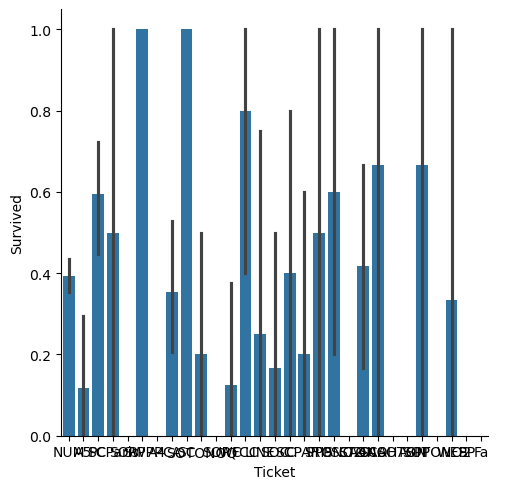

In [56]:
# unique 값에 따른 생존여부가 다양하기 때문에 Y예측에 도움 가능
sns.catplot(x='Ticket', y='Survived', kind='bar',
            data=pd.concat([Y_train, X_train], axis=1))
plt.show()

In [57]:
# 외장함수로 성별을 문자열을 숫자로 변환하는 방법
# LabelEncoder()를 클래스로 생성
# 클래스 이용하여 Ticket 문자열을 학습
# 클래스가 문자열을 숫자로 변환할때 기준으로 사용할 문자열 출력
encoder = preprocessing.LabelEncoder()
encoder = encoder.fit(X_train['Ticket'])
print(encoder.classes_)

['A4' 'A5' 'AS' 'C' 'CA' 'CASOTON' 'FCC' 'Fa' 'LINE' 'NUM' 'PC' 'PP' 'PPP'
 'SC' 'SCA4' 'SCAH' 'SCPARIS' 'SCParis' 'SOC' 'SOP' 'SOPP' 'SOTONO2'
 'SOTONOQ' 'SP' 'STONO' 'STONO2' 'SWPP' 'WC' 'WEP']


In [58]:
# 클래스 이용하여 Train의 문자열을 숫자로 변환
encoder.transform(X_train['Ticket'])

array([ 9,  9,  9,  1, 10,  9, 17, 20,  9,  9,  9, 26,  0,  9,  9,  9,  9,
        9,  4, 13,  9, 10,  9,  9,  9,  9,  9,  9,  9, 10,  9,  9,  9,  9,
       22,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  4,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 19,
       10,  9,  9,  0,  1,  9,  9, 27,  9,  9,  9,  9, 10,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  4, 10,  9,  9,  9,  0,  9,  6,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,  4,  9,  4,
        9,  9, 10,  8,  9,  9,  9,  1,  9,  9,  9,  9,  9, 18,  6,  3,  9,
        4,  9,  9,  9,  9,  9,  9,  9, 16,  9,  9,  9,  9,  9, 12,  9,  1,
        4,  3,  9, 18, 27, 10,  9,  9,  9,  9,  9,  9, 10,  9,  9,  9,  9,
        9,  9, 10,  9,  9, 10,  9, 25, 10,  4,  9, 25,  9,  3,  9, 17, 14,
        9,  9,  9,  9,  9,  9,  9, 10,  9, 24, 10, 16,  4,  9,  9, 22, 10,
        9, 10,  9,  9,  9,  9,  9,  9,  4,  9,  9,  9,  9,  1,  9, 15,  9,
        9,  9,  9,  9,  9

In [59]:
# 클래스 이용하여 Test의 문자열을 숫자로 변환
# 왜 에러가 발생?
# encoder.transform(X_test['Ticket'])

- `Train`에 있는 `unique 문자열`을 사용하여, `Train`에 있는 `문자열을 숫자로`
- `Train`에 있는 `unique 문자열`을 사용하여, `Test`에 있는 `문자열을 숫자로`
- ?? `Train`에 있는 `unique 문자열` $\neq$ `Test`에 있는 `unique 문자열`

In [60]:
# Train Label Encoding 변환 기준 문자열
print(encoder.classes_)

['A4' 'A5' 'AS' 'C' 'CA' 'CASOTON' 'FCC' 'Fa' 'LINE' 'NUM' 'PC' 'PP' 'PPP'
 'SC' 'SCA4' 'SCAH' 'SCPARIS' 'SCParis' 'SOC' 'SOP' 'SOPP' 'SOTONO2'
 'SOTONOQ' 'SP' 'STONO' 'STONO2' 'SWPP' 'WC' 'WEP']


In [61]:
# Test Label Encoding 변환 기준 문자열
list(X_test['Ticket'].unique())

['NUM', 'CA', 'WC', 'PC', 'SOTONOQ', 'A5', 'SCOW', 'SCPARIS', 'FC', 'STONO2']

In [62]:
# Train에 있는 unique 문자열 ≠ Test에 있는 unique 문자열
for i in X_test['Ticket'].unique():
    if i not in encoder.classes_:
        print(i)

SCOW
FC


In [63]:
# Train Label Encoding 변환 기준 문자열에 Test에만 있는 문자열 추가
for label in X_test['Ticket'].unique():
    if label not in encoder.classes_: # unseen label인 경우
        encoder.classes_ = np.append(encoder.classes_, label) # 레이블 추가
print(encoder.classes_)

['A4' 'A5' 'AS' 'C' 'CA' 'CASOTON' 'FCC' 'Fa' 'LINE' 'NUM' 'PC' 'PP' 'PPP'
 'SC' 'SCA4' 'SCAH' 'SCPARIS' 'SCParis' 'SOC' 'SOP' 'SOPP' 'SOTONO2'
 'SOTONOQ' 'SP' 'STONO' 'STONO2' 'SWPP' 'WC' 'WEP' 'SCOW' 'FC']


In [64]:
# 클래스 이용하여 Train & Test 문자열을 숫자로 변환
encoder.transform(X_train['Ticket'])
encoder.transform(X_test['Ticket'])

array([ 9,  9,  9,  9,  9,  9,  4,  9,  9,  9, 27,  9,  9,  9, 10,  9, 10,
        9,  9,  9, 27,  4,  9,  9,  9,  9,  9, 10,  9,  9,  9,  9,  9,  9,
        4,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  4,  9,  9, 22,  9,  9,
        9,  1,  9,  9,  9,  9,  9,  9,  4,  9, 10,  9,  9, 22,  9,  9,  9,
        9,  9, 10,  1,  9,  9,  9,  9,  9, 22, 10, 10,  1,  9,  9,  9,  9,
       29,  9,  9,  9, 22,  9, 16,  9,  9, 10,  9,  9, 10,  9,  9,  9,  9,
        9,  9,  9, 30,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  1, 10,  9,  9,  9,  4,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       10,  9, 22,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,  4, 25,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9, 16,  9,  9])

In [65]:
# Ticket 기존 값 대체
X_train['Ticket'] = encoder.transform(X_train['Ticket'])
X_test['Ticket'] = encoder.transform(X_test['Ticket'])

In [66]:
# Test 확인
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,3,Miss,female,0,1,1,9,11.13,Temp,S
524,525,3,Mr,male,3,0,0,9,7.23,Temp,C
452,453,1,Mr,male,3,0,0,9,27.75,C,C
170,171,1,Mr,male,6,0,0,9,33.50,B,S
620,621,3,Mr,male,2,1,0,9,14.45,Temp,C
...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,Mr,male,3,0,0,9,7.73,Temp,Q
338,339,3,Mr,male,4,0,0,9,8.05,Temp,S
827,828,2,Officer,male,0,0,2,16,37.00,Temp,C
773,774,3,Mr,male,3,0,0,9,7.22,Temp,C


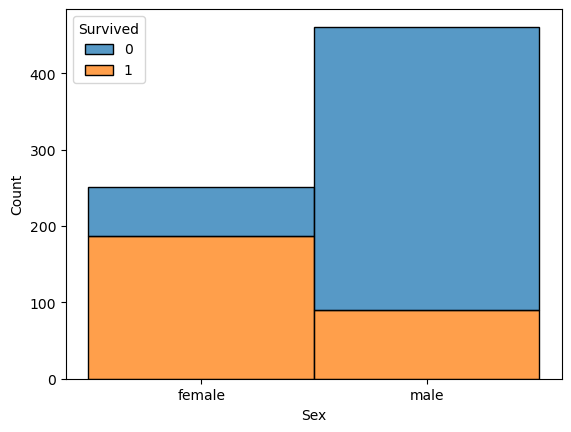

In [67]:
# seaborn 모듈을 sns 이름으로 호출하기
# Sex 변수의 히스토그램을 그려 생존 여부에 따른 분포 차이 확인하기
sns.histplot(x='Sex', hue='Survived', multiple='stack', data=pd.concat([Y_train, X_train], axis=1))
plt.show()

In [68]:
# 외장함수로 성별을 0과 1로 변환하는 방법
# LabelEncoder()를 클래스로 생성
# 클래스 이용하여 성별 문자열을 학습
# 클래스가 문자열을 숫자로 변환할때 기준으로 사용할 문자열 출력
encoder = preprocessing.LabelEncoder()
encoder = encoder.fit(X_train['Sex'])
print(encoder.classes_)

['female' 'male']


In [69]:
# 마찬가지 방식으로 unseen label 체크 후 변환 및 기존값 대체
for label in X_test['Sex'].unique():
    if label not in encoder.classes_: # unseen label인 경우
        encoder.classes_ = np.append(encoder.classes_, label) # 미처리 시 ValueError발생

In [70]:
# 클래스 이용하여 성별 문자열을 숫자로 변환
encoder.transform(X_train['Sex'])

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [71]:
encoder.transform(X_test['Sex'])

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1])

In [72]:
# Test 확인
X_train['Sex'] = encoder.transform(X_train['Sex'])
X_test['Sex'] = encoder.transform(X_test['Sex'])
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,3,Miss,0,0,1,1,9,11.13,Temp,S
524,525,3,Mr,1,3,0,0,9,7.23,Temp,C
452,453,1,Mr,1,3,0,0,9,27.75,C,C
170,171,1,Mr,1,6,0,0,9,33.50,B,S
620,621,3,Mr,1,2,1,0,9,14.45,Temp,C
...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,Mr,1,3,0,0,9,7.73,Temp,Q
338,339,3,Mr,1,4,0,0,9,8.05,Temp,S
827,828,2,Officer,1,0,0,2,16,37.00,Temp,C
773,774,3,Mr,1,3,0,0,9,7.22,Temp,C


In [73]:
# Cabin unique 값 확인
X_train['Cabin'].unique()

array(['B', 'Temp', 'D', 'C', 'E', 'F', 'A', 'G', 'T'], dtype=object)

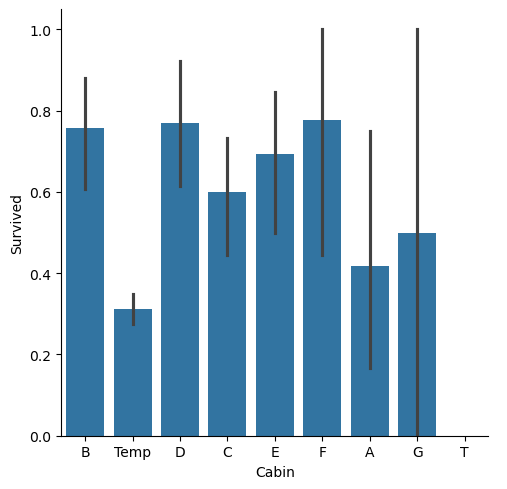

In [74]:
# seaborn 함수의 catogorical plot을 사용하여 Cabin 변수 값에 따른 종속변수의 차이를 확인하기
sns.catplot(x='Cabin', y='Survived', kind='bar',
            data=pd.concat([Y_train, X_train], axis=1))
plt.show()

In [75]:
# 마찬가지 방법으로 Label Encoding
encoder = preprocessing.LabelEncoder()
encoder = encoder.fit(X_train['Cabin'])

for label in X_test['Cabin'].unique():
    if label not in encoder.classes_:
        encoder.classes_ = np.append(encoder.classes_, label)
        
X_train['Cabin'] = encoder.transform(X_train['Cabin'])
X_test['Cabin'] = encoder.transform(X_test['Cabin'])

In [76]:
# Test 확인
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,3,Miss,0,0,1,1,9,11.13,8,S
524,525,3,Mr,1,3,0,0,9,7.23,8,C
452,453,1,Mr,1,3,0,0,9,27.75,2,C
170,171,1,Mr,1,6,0,0,9,33.50,1,S
620,621,3,Mr,1,2,1,0,9,14.45,8,C
...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,Mr,1,3,0,0,9,7.73,8,Q
338,339,3,Mr,1,4,0,0,9,8.05,8,S
827,828,2,Officer,1,0,0,2,16,37.00,8,C
773,774,3,Mr,1,3,0,0,9,7.22,8,C


In [77]:
# Target 3개 변수 모두 한번에 Label Encoding
label_colname = ['Sex', 'Cabin', 'Ticket']

for i in label_colname: # 대상 변수들마다
    encoder = preprocessing.LabelEncoder()
    encoder = encoder.fit(X_train[i])

    for label in X_test[i].unique():
        if label not in encoder.classes_:
            encoder.classes_ = np.append(encoder.classes_, label)

    X_train[i] = encoder.transform(X_train[i])
    X_test[i] = encoder.transform(X_test[i])

In [78]:
# Test 확인
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,3,Miss,0,0,1,1,9,11.13,8,S
524,525,3,Mr,1,3,0,0,9,7.23,8,C
452,453,1,Mr,1,3,0,0,9,27.75,2,C
170,171,1,Mr,1,6,0,0,9,33.50,1,S
620,621,3,Mr,1,2,1,0,9,14.45,8,C
...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,Mr,1,3,0,0,9,7.73,8,Q
338,339,3,Mr,1,4,0,0,9,8.05,8,S
827,828,2,Officer,1,0,0,2,16,37.00,8,C
773,774,3,Mr,1,3,0,0,9,7.22,8,C


In [79]:
# One-hot Encoding: Name, Embarked
# Name unique 값 확인
X_train['Name'].unique()

array(['Miss', 'Mr', 'Mrs', 'Officer', 'Priest', 'Noble'], dtype=object)

In [80]:
# 가변수로 확장
# 가변수의 수는 한개 줄임
pd.get_dummies(X_train, columns=['Name'], drop_first=True)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest
329,330,1,0,1,0,1,9,57.98,1,C,False,False,False,False,False
749,750,3,1,3,0,0,9,7.75,8,Q,True,False,False,False,False
203,204,3,1,4,0,0,9,7.22,8,C,True,False,False,False,False
421,422,3,1,2,0,0,1,7.73,8,Q,True,False,False,False,False
97,98,1,1,2,0,1,10,63.36,3,C,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,0,3,0,1,9,23.00,8,S,False,True,False,False,False
322,323,2,0,3,0,0,9,12.35,8,Q,False,False,False,False,False
382,383,3,1,3,0,0,24,7.92,8,S,True,False,False,False,False
365,366,3,1,3,0,0,3,7.25,8,S,True,False,False,False,False


In [81]:
# 생성된 가변수를 Train 데이터에 반영
# 가변수 생성시 기존 변수는 삭제되기 때문에 셀 재실행으로 인한 에러 방지를 위해 
# Name 변수명이 존재할 경우만 실행되도록 조건문 반영
if 'Name' in X_train.columns:
    X_train = pd.get_dummies(X_train, columns=['Name'], drop_first=True)
    
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest
329,330,1,0,1,0,1,9,57.98,1,C,False,False,False,False,False
749,750,3,1,3,0,0,9,7.75,8,Q,True,False,False,False,False
203,204,3,1,4,0,0,9,7.22,8,C,True,False,False,False,False
421,422,3,1,2,0,0,1,7.73,8,Q,True,False,False,False,False
97,98,1,1,2,0,1,10,63.36,3,C,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,0,3,0,1,9,23.00,8,S,False,True,False,False,False
322,323,2,0,3,0,0,9,12.35,8,Q,False,False,False,False,False
382,383,3,1,3,0,0,24,7.92,8,S,True,False,False,False,False
365,366,3,1,3,0,0,3,7.25,8,S,True,False,False,False,False


In [82]:
# Embarked unique 값 확인
X_train['Embarked'].unique()

array(['C', 'Q', 'S'], dtype=object)

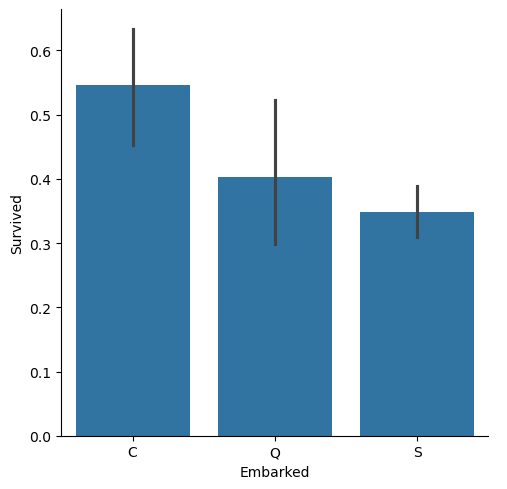

In [83]:
# seaborn 함수의 catogorical plot을 사용하여 Embarked 변수 값에 따른 종속변수의 차이를 확인하기
sns.catplot(x='Embarked', y='Survived', kind='bar',
            data=pd.concat([Y_train, X_train], axis=1))
plt.show()

In [84]:
# Embarked 변수명이 존재할 경우만 가변수 생성 및 Train에 반영
if 'Embarked' in X_train.columns:
    X_train = pd.get_dummies(X_train, columns=['Embarked'], drop_first=True)

In [85]:
# Target 2개 변수 모두 한번에 One-hot Encoding
onehot_colname = ['Name', 'Embarked']

for i in onehot_colname:
    if i in X_train.columns:
        X_train = pd.get_dummies(X_train, columns=[i], drop_first=True)
        

In [86]:
# Train 확인
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
329,330,1,0,1,0,1,9,57.98,1,False,False,False,False,False,False,False
749,750,3,1,3,0,0,9,7.75,8,True,False,False,False,False,True,False
203,204,3,1,4,0,0,9,7.22,8,True,False,False,False,False,False,False
421,422,3,1,2,0,0,1,7.73,8,True,False,False,False,False,True,False
97,98,1,1,2,0,1,10,63.36,3,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,0,3,0,1,9,23.00,8,False,True,False,False,False,False,True
322,323,2,0,3,0,0,9,12.35,8,False,False,False,False,False,True,False
382,383,3,1,3,0,0,24,7.92,8,True,False,False,False,False,False,True
365,366,3,1,3,0,0,3,7.25,8,True,False,False,False,False,False,True


### Code Summary

In [87]:
# 데이터 변환
def label_encoding(X_train, X_test, colname, encoder):
    X_train_le = X_train.copy()
    X_test_le = X_test.copy()
    
    for i in colname: # 대상 변수들마다
        encoder = encoder.fit(X_train[i])

        for label in X_test[i].unique():
            if label not in encoder.classes_:
                encoder.classes_ = np.append(encoder.classes_, label)

        X_train_le[i] = encoder.transform(X_train[i])
        X_test_le[i] = encoder.transform(X_test[i])
        
    return X_train_le, X_test_le


def onehot_encoding(df, colname):
    df_ohe = df.copy()
    
    for i in colname:
        if i in df.columns:
            df_ohe = pd.get_dummies(df_ohe, columns=[i], drop_first=True)
            
    return df_ohe


# 데이터 변환 후 X_train과 X_test의 변수 갯수 일치
def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()
    
    # Train & Test 변수명 체크
    X_te_noncol = [i for i in X_tr.columns if i not in X_te.columns]
    X_tr_noncol = [i for i in X_te.columns if i not in X_tr.columns]

    # 변수 갯수 일치
    if X_te_noncol != []:
        for i in X_te_noncol:
            X_te[i] = 0
            X_te = X_te[X_tr.columns].copy()
            
    if X_tr_noncol != []:
        for i in X_tr_noncol:
            X_tr[i] = 0
            X_tr = X_tr[X_te.columns].copy()
            
    return X_tr, X_te

In [88]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 결측치 처리하기
df = fillnull(df)

# 데이터 범주화 하기
df = prep(df)

# 종속변수로 사용할 컬림 이름 선택하기
# 데이터를 X_train, X_test, Y_train, Y_test로 분리하기
Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

# 데이터 변환 전
display(X_train, X_test)

# 데이터 변환 후
# X_train, X_test 데이터를 출력하고,
# 위 함수를 사용하여,
# ['Sex', 'Cabin', 'Ticket'] 변수들은 Label Encoding 하고,
# ['Name', 'Embarked'] 변수들은 Dummy Variable로 생성하기
# 변환된 결과를 X_train_fe, X_test_fe에 저장후 출력하기

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)

display(X_train_fe, X_test_fe)

(712, 11) (712, 1)
(179, 11) (179, 1)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
329,330,1,Miss,female,1,0,1,NUM,57.98,B,C
749,750,3,Mr,male,3,0,0,NUM,7.75,Temp,Q
203,204,3,Mr,male,4,0,0,NUM,7.22,Temp,C
421,422,3,Mr,male,2,0,0,A5,7.73,Temp,Q
97,98,1,Mr,male,2,0,1,PC,63.36,D,C
...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,Mrs,female,3,0,1,NUM,23.00,Temp,S
322,323,2,Miss,female,3,0,0,NUM,12.35,Temp,Q
382,383,3,Mr,male,3,0,0,STONO,7.92,Temp,S
365,366,3,Mr,male,3,0,0,C,7.25,Temp,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,3,Miss,female,0,1,1,NUM,11.13,Temp,S
524,525,3,Mr,male,3,0,0,NUM,7.23,Temp,C
452,453,1,Mr,male,3,0,0,NUM,27.75,C,C
170,171,1,Mr,male,6,0,0,NUM,33.50,B,S
620,621,3,Mr,male,2,1,0,NUM,14.45,Temp,C
...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,Mr,male,3,0,0,NUM,7.73,Temp,Q
338,339,3,Mr,male,4,0,0,NUM,8.05,Temp,S
827,828,2,Officer,male,0,0,2,SCPARIS,37.00,Temp,C
773,774,3,Mr,male,3,0,0,NUM,7.22,Temp,C


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
329,330,1,0,1,0,1,9,57.98,1,False,False,False,False,False,False,False
749,750,3,1,3,0,0,9,7.75,8,True,False,False,False,False,True,False
203,204,3,1,4,0,0,9,7.22,8,True,False,False,False,False,False,False
421,422,3,1,2,0,0,1,7.73,8,True,False,False,False,False,True,False
97,98,1,1,2,0,1,10,63.36,3,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,0,3,0,1,9,23.00,8,False,True,False,False,False,False,True
322,323,2,0,3,0,0,9,12.35,8,False,False,False,False,False,True,False
382,383,3,1,3,0,0,24,7.92,8,True,False,False,False,False,False,True
365,366,3,1,3,0,0,3,7.25,8,True,False,False,False,False,False,True


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
172,173,3,0,0,1,1,9,11.13,8,False,False,False,False,False,False,True
524,525,3,1,3,0,0,9,7.23,8,True,False,False,False,False,False,False
452,453,1,1,3,0,0,9,27.75,2,True,False,False,False,False,False,False
170,171,1,1,6,0,0,9,33.50,1,True,False,False,False,False,False,True
620,621,3,1,2,1,0,9,14.45,8,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,1,3,0,0,9,7.73,8,True,False,False,False,False,True,False
338,339,3,1,4,0,0,9,8.05,8,True,False,False,False,False,False,True
827,828,2,1,0,0,2,16,37.00,8,False,False,False,True,False,False,False
773,774,3,1,3,0,0,9,7.22,8,True,False,False,False,False,False,False


In [89]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 결측치 처리하기
df = fillnull(df)

# 데이터 범주화 하기
df = prep(df)

# 종속변수로 사용할 컬림 이름 선택하기
# 데이터를 X_train, X_test, Y_train, Y_test로 분리하기
Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

# ['Sex', 'Cabin', 'Ticket'] 변수들은 Label Encoding 하고,
# ['Name', 'Embarked'] 변수들은 Dummy Variable로 생성하기
label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

(712, 11) (712, 1)
(179, 11) (179, 1)


In [90]:
# 결과 출력
display(X_train_fe, X_test_fe)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
329,330,1,0,1,0,1,9,57.98,1,False,False,False,False,False,False,False
749,750,3,1,3,0,0,9,7.75,8,True,False,False,False,False,True,False
203,204,3,1,4,0,0,9,7.22,8,True,False,False,False,False,False,False
421,422,3,1,2,0,0,1,7.73,8,True,False,False,False,False,True,False
97,98,1,1,2,0,1,10,63.36,3,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,0,3,0,1,9,23.00,8,False,True,False,False,False,False,True
322,323,2,0,3,0,0,9,12.35,8,False,False,False,False,False,True,False
382,383,3,1,3,0,0,24,7.92,8,True,False,False,False,False,False,True
365,366,3,1,3,0,0,3,7.25,8,True,False,False,False,False,False,True


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
172,173,3,0,0,1,1,9,11.13,8,False,False,False,False,False,False,True
524,525,3,1,3,0,0,9,7.23,8,True,False,False,False,False,False,False
452,453,1,1,3,0,0,9,27.75,2,True,False,False,False,False,False,False
170,171,1,1,6,0,0,9,33.50,1,True,False,False,False,False,False,True
620,621,3,1,2,1,0,9,14.45,8,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,1,3,0,0,9,7.73,8,True,False,False,False,False,True,False
338,339,3,1,4,0,0,9,8.05,8,True,False,False,False,False,False,True
827,828,2,1,0,0,2,16,37.00,8,False,False,False,True,False,False,False
773,774,3,1,3,0,0,9,7.22,8,True,False,False,False,False,False,False


## 스케일 조정

- **목적:** 변수들의 `크기를 일정하게 맞추어` `크기` 때문에 `영향`이 높은 현상을 회피

> - **수학적:** 독립 변수의 공분산 `행렬 조건수(Condition Number)를 감소`시켜 최적화 안정성 및 수렴 속도 향상 
> - **컴퓨터적:** PC 메모리를 고려하여 `오버플로우(Overflow)나 언더플로우(Underflow)를 줄여줌` 
    
---

**1) Standard Scaler:** <center>$\dfrac{X_{it} - E(X_i)}{SD(X_i)}$</center>
> - 기본 스케일로 평균을 제외하고 표준편차를 나누어 변환  
> - 각 변수(Feature)가 `정규분포를 따른다는 가정`이기에 정규분포가 아닐 시 최선이 아닐 수 있음  
>
> ```python
> sklearn.preprocessing.StandardScaler().fit()
> sklearn.preprocessing.StandardScaler().transform()
> sklearn.preprocessing.StandardScaler().fit_transform()
> ```

<center><img src='Image/Advanced/Scaling_StandardScaler.png' width='500'></center>

**2) Min-Max Scaler:** <center>$\dfrac{X_{it} - min(X_i)}{max(X_i) - min(X_i)}$</center>
> - 가장 많이 활용되는 방식으로 최소\~최대 값이 `0~1` 또는 `-1~1` 사이의 값으로 변환  
> - 각 변수(Feature)가 `정규분포가 아니거나 표준편차가 매우 작을 때` 효과적 
>
> ```python
> sklearn.preprocessing.MinMaxScaler().fit()
> sklearn.preprocessing.MinMaxScaler().transform()
> sklearn.preprocessing.MinMaxScaler().fit_transform()
> ```

<center><img src='Image/Advanced/Scaling_MinMaxScaler.png' width='500'></center>

**3) Robust Scaler:** <center>$\dfrac{X_{it} - Q_1(X_i)}{Q_3(X_i) - Q_1(X_i)}$</center>
> - 최소-최대 스케일러와 유사하지만 `최소/최대 대신`에 IQR(Interquartile Range) 중 `25%값/75%값`을 사용하여 변환  
> - 이상치(Outlier)에 영향을 최소화하였기에 `이상치가 있는 데이터에 효과적`이고 `적은 데이터에도 효과적`인 편  
>
> ```python
> sklearn.preprocessing.RobustScaler().fit()
> sklearn.preprocessing.RobustScaler().transform()
> sklearn.preprocessing.RobustScaler().fit_transform()
> ```

<center><img src='Image/Advanced/Scaling_RobustScaler.png' width='500'></center>

**4) Normalizer:** <center>$\dfrac{X_{it}}{\sqrt{X_{i}^2 + X_{j}^2 + ... + X_{k}^2}}$</center>
> - 각 변수(Feature)를 전체 `n`개 `모든 변수들의 크기들로 나누어`서 변환(by Cartesian Coordinates)  
> - 각 변수들의 값은 `원점으로부터 반지름 1만큼 떨어진 범위 내`로 변환  
>
> ```python
> sklearn.preprocessing.Normalizer().fit()
> sklearn.preprocessing.Normalizer().transform()
> sklearn.preprocessing.Normalizer().fit_transform()
> ```

<center><img src='Image/Advanced/Scaling_Normalizer.png' width='500'></center>


### Code Summary

In [91]:
# 스케일 조정
def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling

In [92]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 결측치 처리하기
df = fillnull(df)

# 데이터 범주화 하기
df = prep(df)

# 종속변수로 사용할 컬림 이름 선택하기
# 데이터를 X_train, X_test, Y_train, Y_test로 분리하기
Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

# ['Sex', 'Cabin', 'Ticket'] 변수들은 Label Encoding 하고,
# ['Name', 'Embarked'] 변수들은 Dummy Variable로 생성하기
label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

# 스케일 조정
scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

(712, 11) (712, 1)
(179, 11) (179, 1)


In [93]:
# 스케일링 전
display(X_train_fe, X_test_fe)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
329,330,1,0,1,0,1,9,57.98,1,False,False,False,False,False,False,False
749,750,3,1,3,0,0,9,7.75,8,True,False,False,False,False,True,False
203,204,3,1,4,0,0,9,7.22,8,True,False,False,False,False,False,False
421,422,3,1,2,0,0,1,7.73,8,True,False,False,False,False,True,False
97,98,1,1,2,0,1,10,63.36,3,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,0,3,0,1,9,23.00,8,False,True,False,False,False,False,True
322,323,2,0,3,0,0,9,12.35,8,False,False,False,False,False,True,False
382,383,3,1,3,0,0,24,7.92,8,True,False,False,False,False,False,True
365,366,3,1,3,0,0,3,7.25,8,True,False,False,False,False,False,True


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
172,173,3,0,0,1,1,9,11.13,8,False,False,False,False,False,False,True
524,525,3,1,3,0,0,9,7.23,8,True,False,False,False,False,False,False
452,453,1,1,3,0,0,9,27.75,2,True,False,False,False,False,False,False
170,171,1,1,6,0,0,9,33.50,1,True,False,False,False,False,False,True
620,621,3,1,2,1,0,9,14.45,8,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,1,3,0,0,9,7.73,8,True,False,False,False,False,True,False
338,339,3,1,4,0,0,9,8.05,8,True,False,False,False,False,False,True
827,828,2,1,0,0,2,16,37.00,8,False,False,False,True,False,False,False
773,774,3,1,3,0,0,9,7.22,8,True,False,False,False,False,False,False


In [94]:
# 스케일링 후
display(X_train_fes.describe().T, X_test_fes.describe().T)

,count,mean,std,min,25%,50%,75%,max
PassengerId,712.00,0.50,0.29,0.00,0.25,0.50,0.74,1.00
Pclass,712.00,0.66,0.41,0.00,0.50,1.00,1.00,1.00
Sex,712.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00
Age,712.00,0.32,0.17,0.00,0.25,0.38,0.38,1.00
SibSp,712.00,0.06,0.14,0.00,0.00,0.00,0.12,1.00
Parch,712.00,0.07,0.15,0.00,0.00,0.00,0.00,1.00
Ticket,712.00,0.35,0.16,0.00,0.32,0.32,0.32,1.00
Fare,712.00,0.06,0.10,0.00,0.02,0.03,0.06,1.00
Cabin,712.00,0.85,0.30,0.00,1.00,1.00,1.00,1.00
Name_Mr,712.00,0.59,0.49,0.00,0.00,1.00,1.00,1.00


,count,mean,std,min,25%,50%,75%,max
PassengerId,179.00,0.51,0.30,0.00,0.25,0.51,0.77,1.00
Pclass,179.00,0.62,0.43,0.00,0.00,1.00,1.00,1.00
Sex,179.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00
Age,179.00,0.31,0.18,0.00,0.25,0.25,0.38,0.75
SibSp,179.00,0.07,0.13,0.00,0.00,0.00,0.12,0.62
Parch,179.00,0.09,0.19,0.00,0.00,0.00,0.20,1.20
Ticket,179.00,0.34,0.15,0.04,0.32,0.32,0.32,1.07
Fare,179.00,0.06,0.07,0.00,0.02,0.04,0.07,0.48
Cabin,179.00,0.81,0.33,0.00,0.62,1.00,1.00,1.00
Name_Mr,179.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


## **코드 정리:** 전치리 단계별 코드의 함수화

In [95]:
# 결측값 처리
def fillnull(df):
    ## Age
    df_agem = df[df.Sex == 'male']
    df_agem = df_agem[['Age']].fillna(df_agem[['Age']].mean())

    df_agefm = df[df.Sex == 'female']
    df_agefm = df_agefm[['Age']].fillna(df_agefm[['Age']].mean())
    df[['Age']] = pd.concat([df_agem, df_agefm], axis=0).sort_index()

    ## Embarked
    df[['Embarked']] = df[['Embarked']].fillna(df['Embarked'].mode()[0], axis=0)

    ## Cabin
    df['Cabin'] = df['Cabin'].str.slice(0,1)
    df['Cabin'] = df['Cabin'].fillna('Temp')
    
    return df


# 데이터 정리
def prep(df):
    # Name
    name_sub = df['Name'].str.split(',', expand=True)[1]
    name_sub = name_sub.str.split('. ', expand=True)[0]
    name_sub.replace([' Mr'], 'Mr', inplace=True)
    name_sub.replace([' Mrs'], 'Mrs', inplace=True)
    name_sub.replace([' Ms', ' Miss'], 'Miss', inplace=True)
    name_sub.replace([' Don', ' Mme', ' Lady', 'Sir', 'Mlle', ' th', ' Jonkheer'], 'Noble', inplace=True)
    name_sub.replace([' Master', ' Major', ' Col', ' Capt', ' Sir', ' Mlle'], 'Officer', inplace=True)
    name_sub.replace([' Dr', ' Rev'], 'Priest', inplace=True)
    df['Name'] = name_sub.copy()

    # Ticket
    df['Ticket'] = df['Ticket'].str.replace('.','').str.replace('/','')
    df['Ticket'] = df['Ticket'].str.strip().str.split(' ').str[0]
    df.loc[df['Ticket'].str.isdigit(), 'Ticket'] = 'NUM'

    # Age
    age_interval = [10, 20, 30, 40, 50, 60, 70, 80, 90]
    if df['Age'].max() > len(age_interval):
        df['Age'] = np.digitize(df['Age'], bins=age_interval)
        
    return df


# 데이터 분리
def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test


# 데이터 변환
def label_encoding(X_train, X_test, colname, encoder):
    X_train_le = X_train.copy()
    X_test_le = X_test.copy()
    
    for i in colname: # 대상 변수들마다
        encoder = encoder.fit(X_train[i])

        for label in X_test[i].unique():
            if label not in encoder.classes_:
                encoder.classes_ = np.append(encoder.classes_, label)

        X_train_le[i] = encoder.transform(X_train[i])
        X_test_le[i] = encoder.transform(X_test[i])
        
    return X_train_le, X_test_le


def onehot_encoding(df, colname):
    df_ohe = df.copy()
    
    for i in colname:
        if i in df.columns:
            df_ohe = pd.get_dummies(df_ohe, columns=[i], drop_first=True)
            
    return df_ohe


# 데이터 변환 후 X_train과 X_test의 변수 갯수 일치
def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()
    
    # Train & Test 변수명 체크
    X_te_noncol = [i for i in X_tr.columns if i not in X_te.columns]
    X_tr_noncol = [i for i in X_te.columns if i not in X_tr.columns]

    # 변수 갯수 일치
    if X_te_noncol != []:
        for i in X_te_noncol:
            X_te[i] = 0
            X_te = X_te[X_tr.columns].copy()
            
    if X_tr_noncol != []:
        for i in X_tr_noncol:
            X_tr[i] = 0
            X_tr = X_tr[X_te.columns].copy()
            
    return X_tr, X_te


# 스케일 조정
def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling

In [96]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 결측치 처리하기
df = fillnull(df)

# 데이터 범주화 하기
df = prep(df)

# 종속변수로 사용할 컬림 이름 선택하기
# 데이터를 X_train, X_test, Y_train, Y_test로 분리하기
Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

# ['Sex', 'Cabin', 'Ticket'] 변수들은 Label Encoding 하고,
# ['Name', 'Embarked'] 변수들은 Dummy Variable로 생성하기
label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

# 스케일 조정
scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

(712, 11) (712, 1)
(179, 11) (179, 1)


In [97]:
# 원데이터 확인
display(X_train, X_test, Y_train, Y_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
329,330,1,Miss,female,1,0,1,NUM,57.98,B,C
749,750,3,Mr,male,3,0,0,NUM,7.75,Temp,Q
203,204,3,Mr,male,4,0,0,NUM,7.22,Temp,C
421,422,3,Mr,male,2,0,0,A5,7.73,Temp,Q
97,98,1,Mr,male,2,0,1,PC,63.36,D,C
...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,Mrs,female,3,0,1,NUM,23.00,Temp,S
322,323,2,Miss,female,3,0,0,NUM,12.35,Temp,Q
382,383,3,Mr,male,3,0,0,STONO,7.92,Temp,S
365,366,3,Mr,male,3,0,0,C,7.25,Temp,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,3,Miss,female,0,1,1,NUM,11.13,Temp,S
524,525,3,Mr,male,3,0,0,NUM,7.23,Temp,C
452,453,1,Mr,male,3,0,0,NUM,27.75,C,C
170,171,1,Mr,male,6,0,0,NUM,33.50,B,S
620,621,3,Mr,male,2,1,0,NUM,14.45,Temp,C
...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,Mr,male,3,0,0,NUM,7.73,Temp,Q
338,339,3,Mr,male,4,0,0,NUM,8.05,Temp,S
827,828,2,Officer,male,0,0,2,SCPARIS,37.00,Temp,C
773,774,3,Mr,male,3,0,0,NUM,7.22,Temp,C


,Survived
329,1
749,0
203,0
421,0
97,1
...,...
98,1
322,1
382,0
365,0


,Survived
172,1
524,0
452,0
170,0
620,0
...,...
388,0
338,1
827,1
773,0


In [98]:
# 전처리 완료 출력
display(X_train_fes, X_test_fes, Y_train, Y_test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
329,0.37,0.00,0.00,0.12,0.00,0.20,0.32,0.11,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00
749,0.84,1.00,1.00,0.38,0.00,0.00,0.32,0.02,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
203,0.23,1.00,1.00,0.50,0.00,0.00,0.32,0.01,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
421,0.47,1.00,1.00,0.25,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
97,0.11,0.00,1.00,0.25,0.00,0.20,0.36,0.12,0.38,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.11,0.50,0.00,0.38,0.00,0.20,0.32,0.04,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
322,0.36,0.50,0.00,0.38,0.00,0.00,0.32,0.02,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
382,0.43,1.00,1.00,0.38,0.00,0.00,0.86,0.02,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
365,0.41,1.00,1.00,0.38,0.00,0.00,0.11,0.01,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
172,0.19,1.00,0.00,0.00,0.12,0.20,0.32,0.02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
524,0.59,1.00,1.00,0.38,0.00,0.00,0.32,0.01,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
452,0.51,0.00,1.00,0.38,0.00,0.00,0.32,0.05,0.25,1.00,0.00,0.00,0.00,0.00,0.00,0.00
170,0.19,0.00,1.00,0.75,0.00,0.00,0.32,0.07,0.12,1.00,0.00,0.00,0.00,0.00,0.00,1.00
620,0.70,1.00,1.00,0.25,0.12,0.00,0.32,0.03,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0.44,1.00,1.00,0.38,0.00,0.00,0.32,0.02,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
338,0.38,1.00,1.00,0.50,0.00,0.00,0.32,0.02,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
827,0.93,0.50,1.00,0.00,0.00,0.40,0.57,0.07,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
773,0.87,1.00,1.00,0.38,0.00,0.00,0.32,0.01,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


,Survived
329,1
749,0
203,0
421,0
97,1
...,...
98,1
322,1
382,0
365,0


,Survived
172,1
524,0
452,0
170,0
620,0
...,...
388,0
338,1
827,1
773,0


In [99]:
# 전처리 후 통계량 확인하기
display(X_train_fes.describe(), X_test_fes.describe(), Y_train.describe(), Y_test.describe())

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
count,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00,712.00
mean,0.50,0.66,0.65,0.32,0.06,0.07,0.35,0.06,0.85,0.59,0.13,0.01,0.05,0.01,0.09,0.73
std,0.29,0.41,0.48,0.17,0.14,0.15,0.16,0.10,0.30,0.49,0.34,0.07,0.21,0.11,0.29,0.45
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.50,0.00,0.25,0.00,0.00,0.32,0.02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.50,1.00,1.00,0.38,0.00,0.00,0.32,0.03,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,0.74,1.00,1.00,0.38,0.12,0.00,0.32,0.06,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
count,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00
mean,0.51,0.62,0.65,0.31,0.07,0.09,0.34,0.06,0.81,0.55,0.17,0.01,0.08,0.03,0.06,0.72
std,0.30,0.43,0.48,0.18,0.13,0.19,0.15,0.07,0.33,0.50,0.37,0.07,0.27,0.17,0.23,0.45
min,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.00,0.00,0.25,0.00,0.00,0.32,0.02,0.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.51,1.00,1.00,0.25,0.00,0.00,0.32,0.04,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,0.77,1.00,1.00,0.38,0.12,0.20,0.32,0.07,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
max,1.00,1.00,1.00,0.75,0.62,1.20,1.07,0.48,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,Survived
count,712.00
mean,0.39
std,0.49
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,1.00


,Survived
count,179.00
mean,0.36
std,0.48
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,1.00


# **Applying Base Algorithm:** Logistic Regression

**1-1) 알고리즘 함수세팅:** 분류문제를 푸는 대표적인 알고리즘 `Logistic Regression`

- `범주형 종속변수`의 적합/추정하기 위한 `변환과정` 필요
- `Logistic/Sigmoid Function`를 사용하여 `곡선(S-curve) 형태로 변환`

<center><img src='Image/Advanced/Linear_Logistic.png' width='600'></center>

> **(1) 회귀분석 추정:**
>
>\begin{align*}
Y \approx \hat{Y} &= f(X_1, X_2, ..., X_k) \\
&= w_0 + w_1X_1 + w_2X_2 + \cdots + w_kX_k \\
&= XW
\end{align*}
>
> **(2) 시그모이드 변환(Logistic/Sigmoid Transformation):** `Binary Classification` 반영하는 `곡선 형태`로 변경
>
>\begin{align*}
Pr(\hat{Y}) &= \dfrac{1}{1+exp(-\hat{Y})} \\ 
&= \dfrac{1}{1+exp(-XW)} \\
&= \dfrac{exp(XW)}{1+exp(XW)}
\end{align*}
>
> **(3) 로짓 변환(Logit Transformation):** `X`의 선형관계 형태로 변환하여 `변수들`로 `Y=1`인 확률 추정
>
>\begin{align*}
Pr(\hat{Y}) \left( 1 + exp(XW) \right) &= exp(XW) \\
Pr(\hat{Y}) &= \left( 1 - Pr(\hat{Y}) \right) exp(XW) \\
\text{Odds(ratio):} \left( \dfrac{Pr(\hat{Y})}{1 - Pr(\hat{Y})} \right) &= exp(XW) \\
\text{Logit(log-odds): } log \left( \dfrac{Pr(\hat{Y})}{1 - Pr(\hat{Y})} \right) &= XW = w_0 + w_1X_1 + w_2X_2 + \cdots + w_kX_k \\
\end{align*}

---

**1-2) 추정 결과 해석:**

> **(1) 해석 방향:** $\hat{Logit}$과 $\hat{Odds}$ `변환`으로 가능
> $$
\begin{align*}
\text{Logit: } log \left( \dfrac{Pr(Y)}{1 - Pr(Y)} \right) &= X\hat{W} = \hat{w}_0 + \hat{w}_1X_1 + \hat{w}_2X_2 + \cdots + \hat{w}_kX_k \\
\text{Odds: } \left( \dfrac{Pr(Y)}{1 - Pr(Y)} \right) &= exp(X\hat{W}) = exp(\hat{w}_0 + \hat{w}_1X_1 + \hat{w}_2X_2 + \cdots + \hat{w}_kX_k) \\
\end{align*}
$$
>
> **(2) 회귀분석과 달리 `Y`의 로짓변환 값을 `X`의 선형관계로 추정하기 때문에, 해석시 `Odds`로 변환해서 해석해야 하므로 `주의`**
>
> \begin{align*}
\left( \dfrac{Pr(Y)}{1 - Pr(Y)} \right) = exp(0.01 + 0.8 X_1)
\end{align*}
>
> - **선형회귀분석:** $X_1$이 1만큼 증가하면 $Y$는 $w_1$만큼 증가
>
>> : $X_1$이 `1`만큼 증가하면 $Y$는 `0.8`만큼 증가
>
> - **로지스틱회귀분석:** $X_1$이 1만큼 증가하면 $\left( \dfrac{Pr(\hat{Y})}{1 - Pr(\hat{Y})} \right)$ 범주변화는 $exp(w_1)$만큼 증가
>
>> : $X_1$이 `1`만큼 증가하면 암에 걸리지 않을 확률보다 암에 걸릴 확률이 $exp(0.8)$ = `2.23`배 더 높음
>
> **(3) Y 확률 예측:** `추정된 계수`의 함수를 `로지스틱 변환`으로 출력
>
> \begin{align*}
Pr(\hat{Y}) &= \dfrac{1}{1+exp(-X\hat{W})} = \dfrac{exp(X\hat{W})}{1+exp(X\hat{W})}
\end{align*}
>
> **(4) 분류 의사결정:** 기본 임계값은 `0.5`로 Y 확률 예측 값이 `0.5 이상이면 1`, `0.5 미만이면 0`으로 분류
>
> \begin{align*}
\hat{Y} = \begin{cases} 1 ~~~~ \text{if } ~~~ Pr(\hat{Y}) >= 0.5 \\ 0 ~~~~ \text{if } ~~~ Pr(\hat{Y}) < 0.5 \end{cases}
\end{align*}

---

**2) 함수 추정을 위한 비용함수:** 나의 주장 기반 알고리즘의 `분류값`($Pr(\hat{Y})$)과 `실제 데이터`($Y$)의 차이를 평가하는 함수

- **이슈: `잔차`를 사용하는 Linear Regression 비용함수 적용 어려움**    

> (1) 분류문제에서는 $\hat{Y}$를 사용한 `잔차(에러)계산이 무의미`   
>
> (2) 잔차($Y - \hat{Y}$)를 `시그모이드 및 로짓 변환`을 하면 Non-convex 형태가 되서 `최소값(Global Minimum) 추정 어려움`    
>
> (3) 정확한 `수학적 방정식 기반` 계수추정 어렵기에 `확률론적 접근 필요`    
>
> <center><img src='Image/Advanced/Cost_Comparison.png' width='600'></center>

- **방향:** 회귀문제와 달리 `새로운 비용함수`가 필요

> - Y를 `잘` 분류하면 `cost=0`으로 그렇지 않으면 cost=$\infty$가 되는 방향
>> - (빨간선) 실제값이 `1`일때 예측값이 `1`이면 Cost는 `0`
>> - (빨간선) 실제값이 `1`일때 예측값이 `0`이면 Cost는 `무한대`
>
> \begin{align*}
\text{Cost} = \begin{cases} -log(Pr(\hat{Y})) ~~~~ & \text{in the case of } ~~~ Y = 1 \\ -log(1-Pr(\hat{Y})) ~~~~ & \text{in the case of } ~~~ Y = 0 \end{cases}
\end{align*}
> <center><img src='Image/Advanced/Cost_Logistic.png' width='600'></center>

- **Cross Entropy 등장:** Y가 0과 1인 경우의 `Cost를 결합`하여 하나의 식으로 표현

> - 로지스틱 알고리즘은 `비용함수`로 `Cross Entropy`를 사용하고 `최소로 하는 계수/가중치 추정`
> - `Y=0`인 경우 `파란부분`만 남고 `Y=1`인 경우 `빨간부분`만 남아 `Class별`로 독립적으로 작동
> - 분류문제의 `Cost 함수는 다양`하고 많지만 통계학적으로 `Cross Entropy`는 계수 추정에 `효율적`인 편
> - `Convex 형태`이기 때문에 `Global Minimum`을 찾기가 용이함
> - 추정된 계수/가중치($\hat{w}$)로 방정식을 만들어 Y=1인 `분류확률` 계산 가능
>
>\begin{align*}
\text{Cost} &= \sum_{i=1}^{m} \left[ - \color{red}{\hat{Y}_{i} log (Pr(\hat{Y}_{i}))} - \color{blue}{(1-\hat{Y}_{i}) log (1-Pr(\hat{Y}_{i}))} \right] \\
\hat{W} &= \underset{W}{\arg\min} \sum_{i=1}^{m} \left[\text{Cost} \right] \\
\end{align*}


## 종속변수와 독립변수의 관계성 확인하기

In [100]:
# 종속변수와 독립변수의 관계 확인을 위해 데이터 붙이기
YX_train = pd.concat([Y_train, X_train_fes], axis=1)
YX_test = pd.concat([Y_test, X_test_fes], axis=1)

In [101]:
# 종속변수와 독립변수의 상관관계 확인하기
YX_test.corr()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
Survived,1.00,0.03,-0.40,-0.56,-0.01,-0.05,0.01,-0.08,0.38,-0.37,-0.55,0.38,-0.06,0.08,0.01,-0.03,-0.20
PassengerId,0.03,1.00,0.01,-0.03,-0.08,-0.04,0.00,0.07,-0.08,0.06,-0.06,0.05,0.11,0.03,0.08,-0.13,0.12
Pclass,-0.40,0.01,1.00,0.20,-0.34,0.14,0.10,0.01,-0.59,0.77,0.25,-0.23,-0.11,-0.06,-0.13,0.18,0.08
Sex,-0.56,-0.03,0.20,1.00,0.04,-0.08,-0.24,0.01,-0.34,0.20,0.81,-0.61,0.06,0.17,0.05,0.03,0.11
Age,-0.01,-0.08,-0.34,0.04,1.00,-0.37,-0.17,-0.06,0.06,-0.27,0.13,0.19,0.03,-0.25,0.15,0.05,-0.03
SibSp,-0.05,-0.04,0.14,-0.08,-0.37,1.00,0.39,-0.07,0.13,0.11,-0.28,0.09,-0.04,0.40,-0.06,-0.01,0.09
Parch,0.01,0.00,0.10,-0.24,-0.17,0.39,1.00,-0.04,0.20,0.06,-0.34,0.20,-0.04,0.21,-0.05,-0.07,0.09
Ticket,-0.08,0.07,0.01,0.01,-0.06,-0.07,-0.04,1.00,-0.02,-0.02,0.03,-0.12,-0.01,-0.03,-0.03,-0.04,0.02
Fare,0.38,-0.08,-0.59,-0.34,0.06,0.13,0.20,-0.02,1.00,-0.62,-0.35,0.32,-0.06,0.09,-0.02,-0.13,-0.19
Cabin,-0.37,0.06,0.77,0.20,-0.27,0.11,0.06,-0.02,-0.62,1.00,0.19,-0.16,0.04,-0.06,-0.05,0.11,0.20


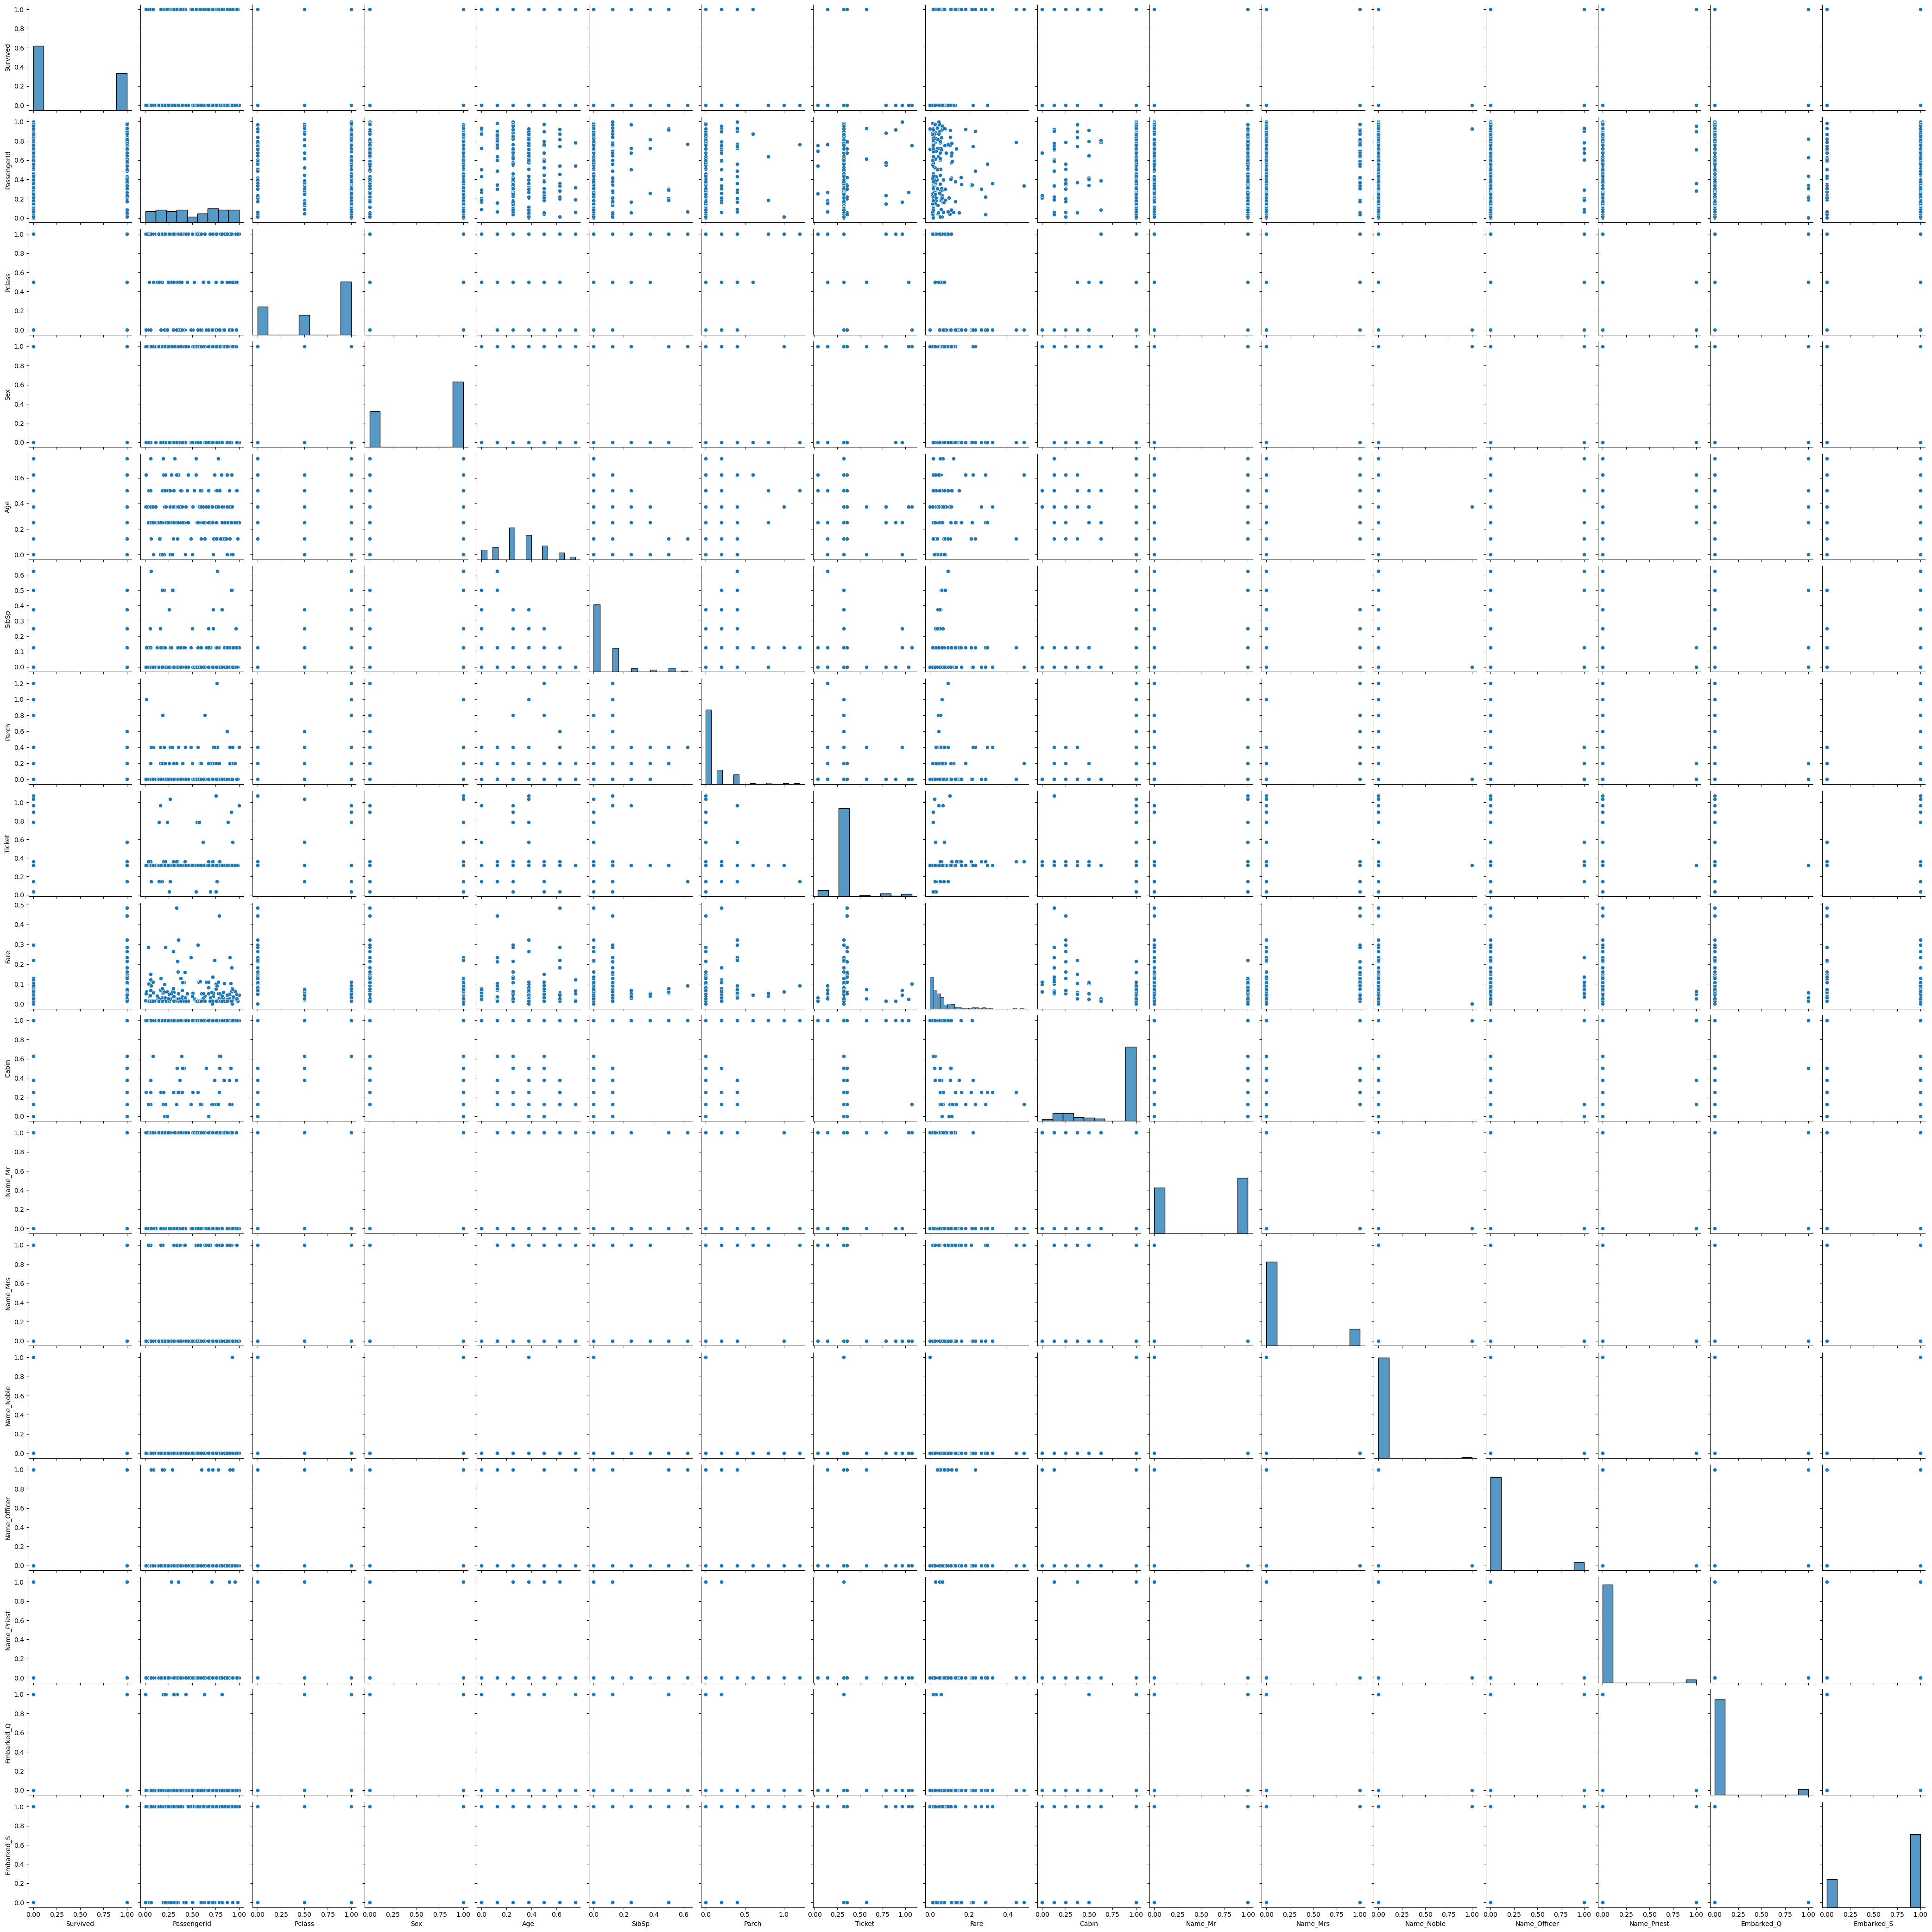

In [102]:
# seaborn 함수를 sns로 사용하여 pairplot 그리기
sns.pairplot(YX_test)
plt.show()

## 로지스틱으로 종속변수와 독립변수 관계 정량적으로 추정하기

In [103]:
# 모든 X_train 데이터의 값들의 통계량을 확인하기
X_train_fes.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
PassengerId,712.00,0.50,0.29,0.00,0.25,0.50,0.74,1.00
Pclass,712.00,0.66,0.41,0.00,0.50,1.00,1.00,1.00
Sex,712.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00
Age,712.00,0.32,0.17,0.00,0.25,0.38,0.38,1.00
SibSp,712.00,0.06,0.14,0.00,0.00,0.00,0.12,1.00
Parch,712.00,0.07,0.15,0.00,0.00,0.00,0.00,1.00
Ticket,712.00,0.35,0.16,0.00,0.32,0.32,0.32,1.00
Fare,712.00,0.06,0.10,0.00,0.02,0.03,0.06,1.00
Cabin,712.00,0.85,0.30,0.00,1.00,1.00,1.00,1.00
Name_Mr,712.00,0.59,0.49,0.00,0.00,1.00,1.00,1.00


In [104]:
# 모든 X_train 데이터의 값들이 숫자로 반영되었는지 확인하기
X_train_fes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 329 to 510
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   712 non-null    float64
 1   Pclass        712 non-null    float64
 2   Sex           712 non-null    float64
 3   Age           712 non-null    float64
 4   SibSp         712 non-null    float64
 5   Parch         712 non-null    float64
 6   Ticket        712 non-null    float64
 7   Fare          712 non-null    float64
 8   Cabin         712 non-null    float64
 9   Name_Mr       712 non-null    float64
 10  Name_Mrs      712 non-null    float64
 11  Name_Noble    712 non-null    float64
 12  Name_Officer  712 non-null    float64
 13  Name_Priest   712 non-null    float64
 14  Embarked_Q    712 non-null    float64
 15  Embarked_S    712 non-null    float64
dtypes: float64(16)
memory usage: 94.6 KB


In [105]:
# statsmodels.api를 sm 이름으로 호출하고,
# 데이터 전체의 왜곡을 줄이기 위해 Y절편 또는 상수항을 출력을 위한 상수 변수를 추가
import statsmodels.api as sm

X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)

In [106]:
# 로지스틱 실행하고 model 변수에 저장하기
# model 변수의 결과를 요약 출력하기
model_logitreg = sm.Logit(Y_train, X_train_fes).fit()
model_logitreg.summary()

Optimization terminated successfully.
         Current function value: 0.414285
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                           16
Date:                Sat, 01 Mar 2025   Pseudo R-squ.:                  0.3801
Time:                        22:34:28   Log-Likelihood:                -294.97
converged:                       True   LL-Null:                       -475.84
Covariance Type:            nonrobust   LLR p-value:                 3.668e-67
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.7321      0.649      5.754      0.000       2.461       5.003
PassengerId     -0.0320      0.365     -0.088      0.930      -0.747       0.683
Pclass          -1.9552      0.409     -4.776      0.000      -2.758      -1.153
Sex           -167.8069   1.49e+07  -1.12e-05      1.000   -2.93e+07    2.93e+07
Age             -2.4841      0.762     -3.262      0.001      -3.977      -0.991
SibSp           -4.1017      1.107     -3.705      0.000      -6.272      -1.932
Parch           -1.4440      0.766     -1.886      0.059      -2.945       0.057
Ticket           0.3358      0.669      0.502      0.616      -0.976       1.647
Fare             1.2815      1.345      0.953      0.341      -1.355       3.918
Cabin           -0.4171      0.508     -0.822      0.411      -1.412       0.578
Name_Mr        165.0223   1.49e+07    1.1e-05      1.000   -2.93e+07    2.93e+07
Name_Mrs         0.8312      0.383      2.169      0.030       0.080       1.582
Name_Noble      61.7478   3.46e+22   1.78e-21      1.000   -6.79e+22    6.79e+22
Name_Officer   168.1782   1.49e+07   1.13e-05      1.000   -2.93e+07    2.93e+07
Name_Priest    164.3790   1.49e+07    1.1e-05      1.000   -2.93e+07    2.93e+07
Embarked_Q       0.0129      0.436      0.030      0.976      -0.841       0.867
Embarked_S      -0.2858      0.282     -1.012      0.312      -0.839       0.268
================================================================================
"""

In [107]:
# model 변수에서 추정된 계수만 출력하기
model_logitreg.params

const             3.73
PassengerId      -0.03
Pclass           -1.96
Sex            -167.81
Age              -2.48
SibSp            -4.10
Parch            -1.44
Ticket            0.34
Fare              1.28
Cabin            -0.42
Name_Mr         165.02
Name_Mrs          0.83
Name_Noble       61.75
Name_Officer    168.18
Name_Priest     164.38
Embarked_Q        0.01
Embarked_S       -0.29
dtype: float64

In [108]:
# exponential 반영하여 계수의 의미를 해석하기
print("Effect of X..")
model_logitreg_beta = pd.DataFrame(model_logitreg.params, columns=['coef'])
pd.concat([model_logitreg_beta, 
           pd.DataFrame(np.exp(model_logitreg.params), columns=['odds'])],
          axis=1)

Effect of X..


,coef,odds
const,3.73,41.77
PassengerId,-0.03,0.97
Pclass,-1.96,0.14
Sex,-167.81,0.00
Age,-2.48,0.08
SibSp,-4.10,0.02
Parch,-1.44,0.24
Ticket,0.34,1.40
Fare,1.28,3.60
Cabin,-0.42,0.66


## 학습된 로지스틱으로 과거/현재/미래 예측하기

In [109]:
# 학습된 모델을 사용하여 X_train 값 예측하기
model_logitreg.predict(X_train_fes)

329   0.97
749   0.10
203   0.07
421   0.12
97    0.54
      ... 
98    0.86
322   0.82
382   0.09
365   0.07
510   0.13
Length: 712, dtype: float64

In [110]:
# 학습된 모델을 사용하여 X_train 값 예측하고 DataFrame 형식으로 바꾸며 컬럼 이름은 'Pred'로 출력하기
pd.DataFrame(model_logitreg.predict(X_train_fes), columns=['Pred'])

,Pred
329,0.97
749,0.10
203,0.07
421,0.12
97,0.54
...,...
98,0.86
322,0.82
382,0.09
365,0.07


In [111]:
# 학습된 모델을 사용하여 X_train 및 X_test 값 예측하고 P_trpred 및 P_tepred 값으로 대체하기
P_trpred = pd.DataFrame(model_logitreg.predict(X_train_fes), columns=['Pred'])
P_tepred = pd.DataFrame(model_logitreg.predict(X_test_fes), columns=['Pred'])

In [112]:
# 실제 Y_train과 예측치인 P_trpred 붙여서 비교하기
pd.concat([Y_train, P_trpred], axis=1)

,Survived,Pred
329,1,0.97
749,0,0.10
203,0,0.07
421,0,0.12
97,1,0.54
...,...,...
98,1,0.86
322,1,0.82
382,0,0.09
365,0,0.07


In [113]:
# 실제 Y_test과 예측치인 P_tepred 붙여서 비교하기
pd.concat([Y_test, P_tepred], axis=1)

,Survived,Pred
172,1,0.60
524,0,0.10
452,0,0.52
170,0,0.26
620,0,0.08
...,...,...
388,0,0.10
338,1,0.06
827,1,0.92
773,0,0.09


## **코드 정리:** 전처리 + 모델링

In [114]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Logistic Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)

model_logitreg = sm.Logit(Y_train, X_train_fes).fit()
display(model_logitreg.summary())

## 계수 해석
print("Effect of X..")
model_logitreg_beta = pd.DataFrame(model_logitreg.params, columns=['coef'])
display(pd.concat([model_logitreg_beta, 
                   pd.DataFrame(np.exp(model_logitreg.params), columns=['odds'])],
                   axis=1))

# 예측
P_trpred = model_logitreg.predict(X_train_fes)
P_tepred = model_logitreg.predict(X_test_fes)

(712, 11) (712, 1)
(179, 11) (179, 1)
Optimization terminated successfully.
         Current function value: 0.414285
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                           16
Date:                Sat, 01 Mar 2025   Pseudo R-squ.:                  0.3801
Time:                        22:34:28   Log-Likelihood:                -294.97
converged:                       True   LL-Null:                       -475.84
Covariance Type:            nonrobust   LLR p-value:                 3.668e-67
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.7321      0.649      5.754      0.000       2.461       5.003
PassengerId     -0.0320      0.365     -0.088      0.930      -0.747       0.683
Pclass          -1.9552      0.409     -4.776      0.000      -2.758      -1.153
Sex           -167.8069   1.49e+07  -1.12e-05      1.000   -2.93e+07    2.93e+07
Age             -2.4841      0.762     -3.262      0.001      -3.977      -0.991
SibSp           -4.1017      1.107     -3.705      0.000      -6.272      -1.932
Parch           -1.4440      0.766     -1.886      0.059      -2.945       0.057
Ticket           0.3358      0.669      0.502      0.616      -0.976       1.647
Fare             1.2815      1.345      0.953      0.341      -1.355       3.918
Cabin           -0.4171      0.508     -0.822      0.411      -1.412       0.578
Name_Mr        165.0223   1.49e+07    1.1e-05      1.000   -2.93e+07    2.93e+07
Name_Mrs         0.8312      0.383      2.169      0.030       0.080       1.582
Name_Noble      61.7478   3.46e+22   1.78e-21      1.000   -6.79e+22    6.79e+22
Name_Officer   168.1782   1.49e+07   1.13e-05      1.000   -2.93e+07    2.93e+07
Name_Priest    164.3790   1.49e+07    1.1e-05      1.000   -2.93e+07    2.93e+07
Embarked_Q       0.0129      0.436      0.030      0.976      -0.841       0.867
Embarked_S      -0.2858      0.282     -1.012      0.312      -0.839       0.268
================================================================================
"""

Effect of X..


,coef,odds
const,3.73,41.77
PassengerId,-0.03,0.97
Pclass,-1.96,0.14
Sex,-167.81,0.00
Age,-2.48,0.08
SibSp,-4.10,0.02
Parch,-1.44,0.24
Ticket,0.34,1.40
Fare,1.28,3.60
Cabin,-0.42,0.66


# **Evaluation:** 분석 성능 확인/평가하기

---
- **Structure:**

<center><img src='Image/Advanced/DataSplit_Concept1.png' width='700'></center>

<center><img src='Image/Advanced/Evaluation_Yhat.PNG' width='600'></center>

---

**1) 오차행렬(Confusion Matrix):** `정답 클래스`와 `알고리즘 예측 클래스`의 일치 갯수 정리  

- `Binary` Classification

| 　 | 예측 0 | 예측 1 |
|:-:|:-:|:-:|
| 정답 0 | 정답이 0, 예측이 0인 데이터 수 <br> (3) | 정답이 0, 예측이 1인 데이터 수 <br> (0)|
| 정답 1 | 정답이 1, 예측이 0인 데이터 수 <br> (1) | 정답이 1, 예측이 1인 데이터 수 <br> (3) |

- `Multi-class` Classification

| 　 | 예측 0 | 예측 1 | … | 예측 K |
|:-:|:-:|:-:|:-:|:-:|
| 정답 0 | 정답 0, 예측 0인 데이터 수 | 정답 0, 예측 1인 데이터 수 | … | 정답 0, 예측 K인 데이터 수 |
| 정답 1 | 정답 1, 예측 0인 데이터 수 | 정답 1, 예측 1인 데이터 수 | … | 정답 1, 예측 K인 데이터 수 |
| … | … | … | … | … |
| 정답 K | 정답 K, 예측 0인 데이터 수 | 정답 K, 예측 1인 데이터 수 | … | 정답 K, 예측 K인 데이터 수 |

**2) 정확도(Accuracy):** 전체 데이터 중 정확하게 예측한 클래스의 비율(`0과 1을 모두 포함`)
> - 예측이 정답과 얼마나 정확한가?

| 　 | 예측 0 | 예측 1 |
|:-:|:-:|:-:|
| 정답 0 | True Negative (TN) <br> (3) | False Positive (FP) <br> (0) |
| 정답 1 | False Negative (FN) <br> (1) | True Positive (TP) <br> (3) |

\begin{align*}
\text{Accuracy} = \frac{TP + TN}{TP + FN + FP + TN}
\end{align*}

**3) 정밀도(Precision):** `클래스 1`로 예측한 값들 중 `실제 클래스 1의 비율`
> - 예측한 것중 정답의 비율은?
> - `잘못예측한 클래스 1의 비중`을 파악하고 줄이는데 목적
> - `암환자`가 아닌데 암에 걸릴거라고 예측하여 과도한 사람들의 `검진 증가 우려`

| 　 | 예측 1 |
|:-:|:-:|
| 정답 0 | False Positive (FP) <br> (0) |
| 정답 1 | True Positive (TP) <br> (3) |

\begin{align*}
\text{Precision} = \frac{TP}{TP + FP}
\end{align*}

**4) 재현율(Recall/Sensitivity/True Positive Rate):** `실제 클래스 1` 값들 중 `예측 클래스 1`의 비율
> - 정답 클래스 1중 예측으로 맞춘 비율은?
> - `잘못예측한 클래스 0의 비중`을 파악하고 줄이는데 목적
> - `암환자`인데 암이 아니라 예측하여 과도한 `사망율 증가 우려`

| 　 | 예측 0 | 예측 1 |
|:-:|:-:|:-:|
| 정답 1 | False Negative (FN) <br> (1) | True Positive (TP) <br> (3) |

\begin{align*}
\text{Recall = TPR} = \frac{TP}{TP + FN}
\end{align*}

**5) F1점수(F1-score):** `정밀도`와 `재현율`의 `Trade Off`관계 반영위해 `(가중)평균`으로 모두 잘 맞추었는지 평가
> - 정밀도과 재현율이 `모두 중요한 문제`의 경우 중요
> - 정밀도와 재현율을 `따로 보면 한쪽으로 편중된(Bias) 의사결정`이 될 수 있는 위험
> - 다양한 평균의 종류 중 `조화평균`을 사용하여 계산
> - 정밀도과 재현율 중 `한쪽에 치우치지 않았을 때 높은 값`

\begin{align*}
\text{F1-score} = \frac{2 * precision * recall}{precision + recall}
\end{align*}

**6) ROC커브(Receiver Operator Characteristic Curve):** 분류 기준값(Threshold)에 따라 `재현율과 거짓율의 검증지표의 변화`를 확인하기 위한 `시각화 지표`

<center><img src='Image/Advanced/Evaluation_Yhat.PNG' width='600'></center>

- **실제 예측결과 분포(히스토그램):**

<center><img src='Image/Advanced/Evaluation_Prediction_Hist.png' width='500'></center>

<center><img src='Image/Advanced/Evaluation_ROC_Distribution.png' width='500'></center>

| 　 | 예측 0 | 예측 1 |
|:-:|:-:|:-:|
| 정답 0 | True Negative (TN) <br> (3) | False Positive (FP) <br> (0) |
| 정답 1 | False Negative (FN) <br> (1) | True Positive (TP) <br> (3) |

- **재현율(Recall/Sensitivity/True Positive Rate):** `실제 클래스 1` 값들 중 `예측 클래스 1`의 비율
> - 정답 클래스 1중 예측으로 `맞춘 비율`은?
> - `잘못예측한 클래스 0의 비중`을 파악하고 줄이는데 목적
> - `암환자`인데 암이 아니라 예측하여 과도한 `사망율 증가 우려`

| 　 | 예측 0 | 예측 1 |
|:-:|:-:|:-:|
| 정답 1 | False Negative (FN) <br> (1) | True Positive (TP) <br> (3) |

\begin{align*}
\text{TPR} = \frac{TP}{TP + FN}
\end{align*}

- **거짓율(Fall-out/False Positive Rate):** `실제 클래스 0` 값들 중 `예측 클래스 1`의 비율
> - 정답 클래스 0중 예측으로 `틀린 비율`은?
> - 다른 Metrics와 달리 `낮을 수록 좋음`

| 　 | 예측 0 | 예측 1 |
|:-:|:-:|:-:|
| 정답 0 | True Negative (TN) <br> (3) | False Positive (FP) <br> (0) |

\begin{align*}
\text{FPR} = \frac{FP}{FP + TN}
\end{align*}

- **RUC Curve:** 재현율과 거짓율의 `변화를 시각화`

> **기준값 변화에 따른 변화:**
>
> - 재현율(TPR)과 거짓율(FPR)은 `양의 상관관계` 존재
> - Threshold가 낮아지면 `1예측 갯수가 많아지고 TP와 FP모두 증가`
> $\rightarrow$  `TPR & FPR 증가`
> - Threshold가 높아지면 `1예측 갯수가 줄어들고 TP와 FP모두 감소`
> $\rightarrow$  `TPR & FPR 감소`

<center><img src='Image/Advanced/TPR_FPR_Positive.gif' width='400'></center>

<center><img src='Image/Advanced/TPR_FPR_Negative.gif' width='400'></center>

<center><img src='Image/Advanced/Evaluation_ROC_Fit.png' width='500'></center>

<center><img src='Image/Advanced/TPR_FPR_ROC.gif' width='500'>(https://angeloyeo.github.io/2020/08/05/ROC.html)</center>

> **예시:**

<center><img src='Image/Advanced/Evaluation_ROC_Type.png' width='900'></center>

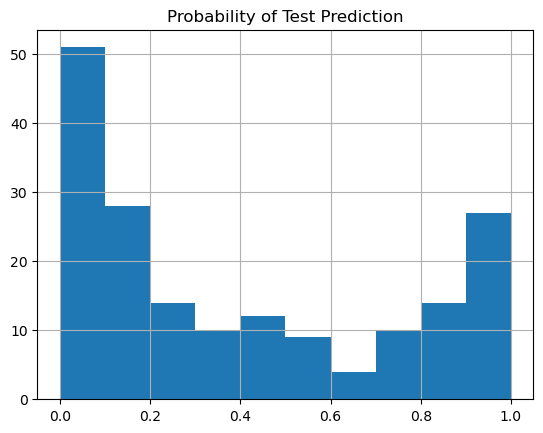

In [115]:
# Y예측값들의 분포 확인
pd.DataFrame(P_tepred, columns=['Probability of Test Prediction']).hist()
plt.show()

In [116]:
# confucion_matrix를 Y_test 성능 확인하기
# P_tepred 값은 0 또는 1이 아닌 확률이므로 변환 필요
confusion_matrix(Y_test, P_tepred>=0.5)

array([[101,  13],
       [ 14,  51]], dtype=int64)

In [117]:
# confusion matrix 출력을 DataFrame으로 변환하고,
# index=['True: 0', 'True: 1']
# columns=['Pred: 0', 'Pred: 1']
conf_mat_te = confusion_matrix(Y_test, P_tepred>=0.5)
pd.DataFrame(conf_mat_te, index=['True: 0', 'True: 1'], columns=['Pred: 0', 'Pred: 1'])

,Pred: 0,Pred: 1
True: 0,101,13
True: 1,14,51


In [118]:
# Confusion Matrix 함수화
def evaluation_class_ConfusionMatrix(Y_true, Y_pred):
    conf_mat = confusion_matrix(Y_true, Y_pred)
    conf_mat = pd.DataFrame(conf_mat, 
                            index=['True: 0', 'True: 1'], 
                            columns=['Pred: 0', 'Pred: 1'])
    
    return conf_mat

evaluation_class_ConfusionMatrix(Y_test, P_tepred>=0.5)

,Pred: 0,Pred: 1
True: 0,101,13
True: 1,14,51


In [119]:
# classification_report를 사용하여 precision / recall / f1-score / support / accuracy 출력하기
print(classification_report(Y_test, P_tepred>=0.5, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.88      0.89      0.88       114
     class 1       0.80      0.78      0.79        65

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [120]:
# Classification Report 함수화
def evaluation_class_ClassificationReport(Y_true, Y_pred):
    print(classification_report(Y_true, Y_pred, 
                                target_names=['class 0', 'class 1']))
    
evaluation_class_ClassificationReport(Y_test, P_tepred>=0.5)

              precision    recall  f1-score   support

     class 0       0.88      0.89      0.88       114
     class 1       0.80      0.78      0.79        65

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [121]:
# 추정된 Threshold 기준별 FPR, TPR 확인
fpr, tpr, thresholds = roc_curve(Y_test, P_tepred)
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.00877193, 0.00877193,
        0.01754386, 0.01754386, 0.02631579, 0.02631579, 0.03508772,
        0.03508772, 0.04385965, 0.04385965, 0.05263158, 0.05263158,
        0.07894737, 0.07894737, 0.10526316, 0.10526316, 0.13157895,
        0.13157895, 0.14035088, 0.14035088, 0.15789474, 0.15789474,
        0.21052632, 0.21052632, 0.21929825, 0.21929825, 0.28070175,
        0.28070175, 0.28947368, 0.28947368, 0.57017544, 0.57017544,
        0.71929825, 0.71929825, 0.80701754, 0.80701754, 0.88596491,
        0.88596491, 1.        ]),
 array([0.        , 0.03076923, 0.2       , 0.2       , 0.26153846,
        0.26153846, 0.36923077, 0.36923077, 0.44615385, 0.44615385,
        0.50769231, 0.50769231, 0.64615385, 0.64615385, 0.69230769,
        0.69230769, 0.72307692, 0.72307692, 0.78461538, 0.78461538,
        0.8       , 0.8       , 0.83076923, 0.83076923, 0.84615385,
        0.84615385, 0.86153846, 0.86153846, 0.89230769, 0.89230769,
        0.9076

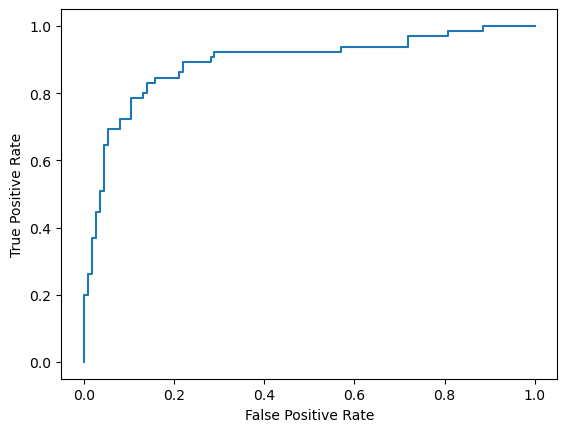

In [122]:
# roc_curve 함수를 사용하여 다양한 Threshold 별 결과 확인
# 추정된 FPR, TPR을 사용하여 시각화하기
fpr, tpr, thresholds = roc_curve(Y_test, P_tepred)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [123]:
# roc_curve의 넓이인 auc를 metrics 내 auc 함수로 계산하기
auc(fpr, tpr)

0.8914979757085021

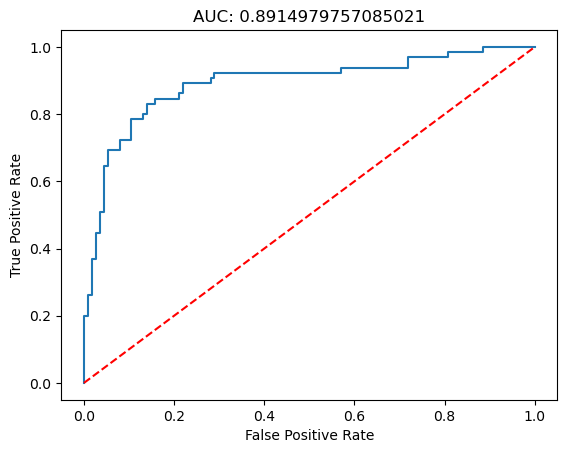

In [124]:
# 계산된 auc를 roc curve 내 title로 반영하기
fpr, tpr, thresholds = roc_curve(Y_test, P_tepred)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.title('AUC: ' + str(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [125]:
# Threshold가 0.5일때의 TPR, FPR 계산
cm = evaluation_class_ConfusionMatrix(Y_test, P_tepred>=0.5)
recall = cm.iloc[1,1] / cm.sum(axis=1).values[1]
fallout = cm.iloc[0,1] / cm.sum(axis=1).values[0]
recall, fallout

(0.7846153846153846, 0.11403508771929824)

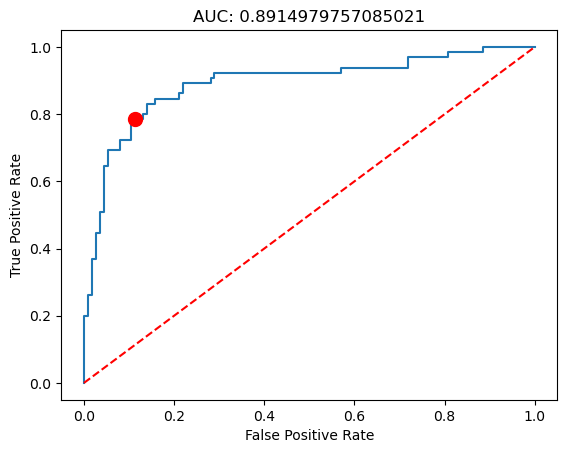

In [126]:
# Threshold가 0.5일때의 TPR, FPR 그래프에 빨간점으로 반영
fpr, tpr, thresholds = roc_curve(Y_test, P_tepred)
cm = evaluation_class_ConfusionMatrix(Y_test, P_tepred>=0.5)
recall = cm.iloc[1,1] / cm.sum(axis=1).values[1]
fallout = cm.iloc[0,1] / cm.sum(axis=1).values[0]
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.plot([fallout], [recall], 'ro', ms=10)
plt.title('AUC: ' + str(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

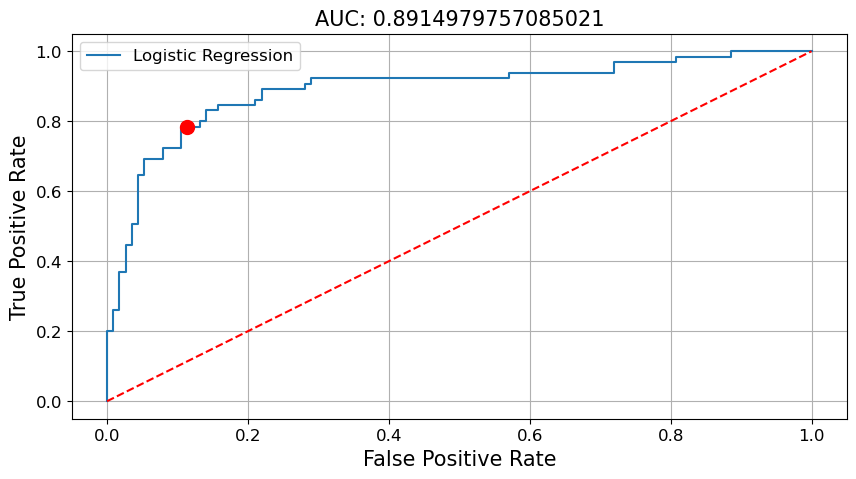

In [127]:
# ROC Curve & AUC 함수화
def evaluation_class_ROCAUC(Y_true, P_pred, figsize=(10,5)):
    fpr, tpr, thresholds = roc_curve(Y_true, P_pred)
    cm = evaluation_class_ConfusionMatrix(Y_true, P_pred>=0.5)
    recall = cm.iloc[1,1] / cm.sum(axis=1).values[1]
    fallout = cm.iloc[0,1] / cm.sum(axis=1).values[0]
    
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot([fallout], [recall], 'ro', ms=10)
    plt.title('AUC: ' + str(auc(fpr, tpr)), fontsize=15)
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid()
    plt.show()
    
evaluation_class_ROCAUC(Y_test, P_tepred)

In [128]:
# 잘못 예측한 1과 0의 오류정도 파악
precision_recall_curve(Y_test, P_tepred)

(array([0.36312849, 0.36516854, 0.36723164, 0.36931818, 0.37142857,
        0.37356322, 0.37572254, 0.37790698, 0.38011696, 0.38235294,
        0.38461538, 0.38690476, 0.38922156, 0.39156627, 0.38787879,
        0.3902439 , 0.39263804, 0.39506173, 0.39751553, 0.4       ,
        0.40251572, 0.40506329, 0.40764331, 0.41025641, 0.40645161,
        0.40909091, 0.41176471, 0.41447368, 0.41721854, 0.42      ,
        0.42281879, 0.42567568, 0.42857143, 0.43150685, 0.43448276,
        0.43055556, 0.42657343, 0.42957746, 0.43262411, 0.43571429,
        0.43884892, 0.44202899, 0.44525547, 0.44852941, 0.45185185,
        0.45522388, 0.45864662, 0.46212121, 0.46564885, 0.46923077,
        0.47286822, 0.4765625 , 0.48031496, 0.48412698, 0.48      ,
        0.48387097, 0.48780488, 0.49180328, 0.49586777, 0.5       ,
        0.50420168, 0.50847458, 0.51282051, 0.51724138, 0.52173913,
        0.52631579, 0.53097345, 0.53571429, 0.54054054, 0.54545455,
        0.55045872, 0.55555556, 0.56074766, 0.56

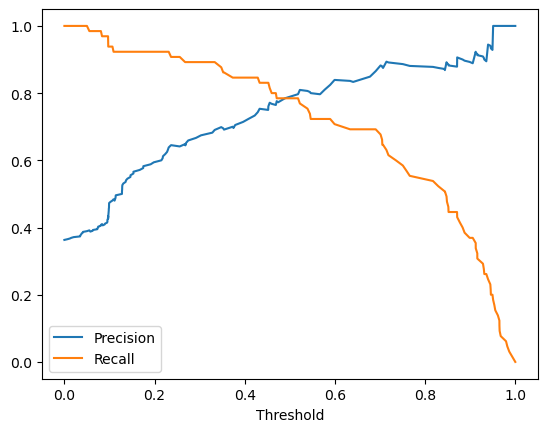

In [129]:
# 잘못 예측한 1과 0의 오류정도 시각화
pre, rec, thresholds = precision_recall_curve(Y_test, P_tepred)
plt.plot(thresholds, pre[:-1], label='Precision')
plt.plot(thresholds, rec[1:], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()

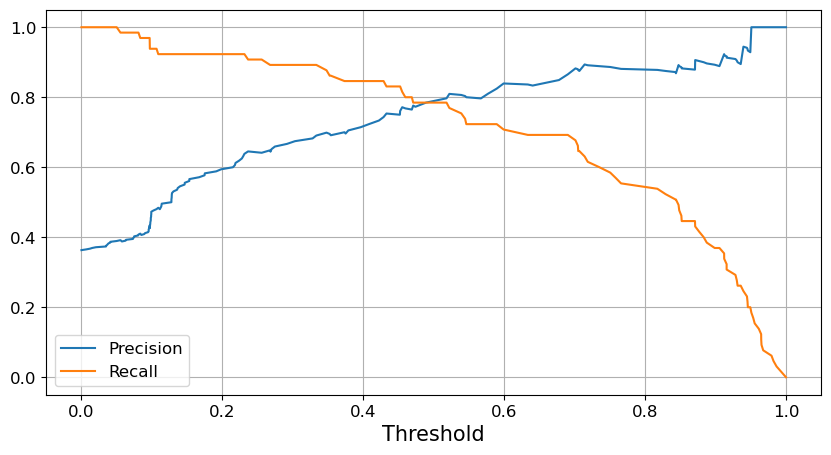

In [130]:
# Precision & Recall Curve 함수화
def evaluation_class_PrecisionRecall(Y_true, P_pred, figsize=(10,5)):
    pre, rec, thresholds = precision_recall_curve(Y_true, P_pred)
    
    plt.figure(figsize=figsize)
    plt.plot(thresholds, pre[:-1], label='Precision')
    plt.plot(thresholds, rec[1:], label='Recall')
    plt.xlabel('Threshold', fontsize=15)
    plt.ylabel('', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid()
    plt.show()
    
evaluation_class_PrecisionRecall(Y_test, P_tepred)

## **코드 정리:** 전처리 + 모델링 + 검증

In [131]:
# Confusion Matrix 함수화
def evaluation_class_ConfusionMatrix(Y_true, Y_pred):
    conf_mat = confusion_matrix(Y_true, Y_pred)
    conf_mat = pd.DataFrame(conf_mat, 
                            index=['True: 0', 'True: 1'], 
                            columns=['Pred: 0', 'Pred: 1'])
    
    return conf_mat


# Classification Report 함수화
def evaluation_class_ClassificationReport(Y_true, Y_pred):
    print(classification_report(Y_true, Y_pred, 
                                target_names=['class 0', 'class 1']))


# ROC Curve & AUC 함수화
def evaluation_class_ROCAUC(Y_true, P_pred, figsize=(10,5)):
    fpr, tpr, thresholds = roc_curve(Y_true, P_pred)
    cm = evaluation_class_ConfusionMatrix(Y_true, P_pred>=0.5)
    recall = cm.iloc[1,1] / cm.sum(axis=1).values[1]
    fallout = cm.iloc[0,1] / cm.sum(axis=1).values[0]
    
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot([fallout], [recall], 'ro', ms=10)
    plt.title('AUC: ' + str(auc(fpr, tpr)), fontsize=15)
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid()
    plt.show()


# Precision & Recall Curve 함수화
def evaluation_class_PrecisionRecall(Y_true, P_pred, figsize=(10,5)):
    pre, rec, thresholds = precision_recall_curve(Y_true, P_pred)
    
    plt.figure(figsize=figsize)
    plt.plot(thresholds, pre[:-1], label='Precision')
    plt.plot(thresholds, rec[1:], label='Recall')
    plt.xlabel('Threshold', fontsize=15)
    plt.ylabel('', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid()
    plt.show()

(712, 11) (712, 1)
(179, 11) (179, 1)
Optimization terminated successfully.
         Current function value: 0.414285
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                           16
Date:                Sat, 01 Mar 2025   Pseudo R-squ.:                  0.3801
Time:                        22:34:30   Log-Likelihood:                -294.97
converged:                       True   LL-Null:                       -475.84
Covariance Type:            nonrobust   LLR p-value:                 3.668e-67
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.7321      0.649      5.754      0.000       2.461       5.003
PassengerId     -0.0320      0.365     -0.088      0.930      -0.747       0.683
Pclass          -1.9552      0.409     -4.776      0.000      -2.758      -1.153
Sex           -167.8069   1.49e+07  -1.12e-05      1.000   -2.93e+07    2.93e+07
Age             -2.4841      0.762     -3.262      0.001      -3.977      -0.991
SibSp           -4.1017      1.107     -3.705      0.000      -6.272      -1.932
Parch           -1.4440      0.766     -1.886      0.059      -2.945       0.057
Ticket           0.3358      0.669      0.502      0.616      -0.976       1.647
Fare             1.2815      1.345      0.953      0.341      -1.355       3.918
Cabin           -0.4171      0.508     -0.822      0.411      -1.412       0.578
Name_Mr        165.0223   1.49e+07    1.1e-05      1.000   -2.93e+07    2.93e+07
Name_Mrs         0.8312      0.383      2.169      0.030       0.080       1.582
Name_Noble      61.7478   3.46e+22   1.78e-21      1.000   -6.79e+22    6.79e+22
Name_Officer   168.1782   1.49e+07   1.13e-05      1.000   -2.93e+07    2.93e+07
Name_Priest    164.3790   1.49e+07    1.1e-05      1.000   -2.93e+07    2.93e+07
Embarked_Q       0.0129      0.436      0.030      0.976      -0.841       0.867
Embarked_S      -0.2858      0.282     -1.012      0.312      -0.839       0.268
================================================================================
"""

Effect of X..


,coef,odds
const,3.73,41.77
PassengerId,-0.03,0.97
Pclass,-1.96,0.14
Sex,-167.81,0.00
Age,-2.48,0.08
SibSp,-4.10,0.02
Parch,-1.44,0.24
Ticket,0.34,1.40
Fare,1.28,3.60
Cabin,-0.42,0.66


Confusion Matrix: Train


,Pred: 0,Pred: 1
True: 0,380,55
True: 1,65,212


Confusion Matrix: Test


,Pred: 0,Pred: 1
True: 0,101,13
True: 1,14,51


Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.85      0.87      0.86       435
     class 1       0.79      0.77      0.78       277

    accuracy                           0.83       712
   macro avg       0.82      0.82      0.82       712
weighted avg       0.83      0.83      0.83       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.89      0.88       114
     class 1       0.80      0.78      0.79        65

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

ROC Curve: Train


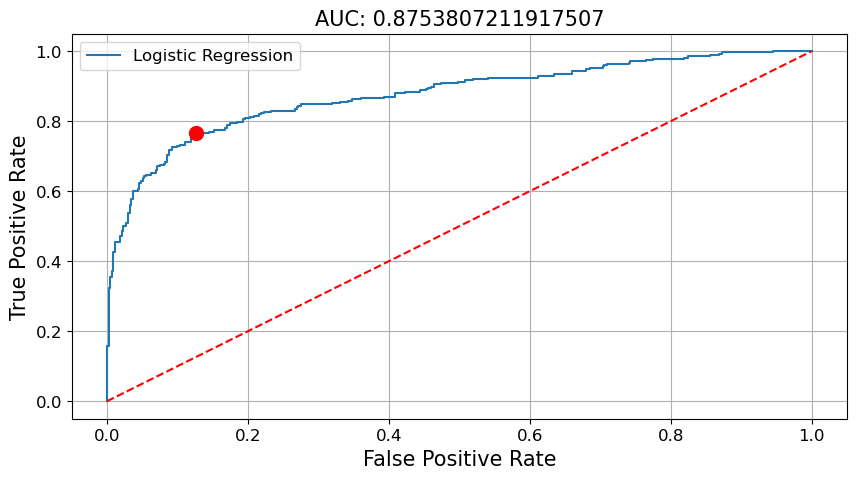

ROC Curve: Test


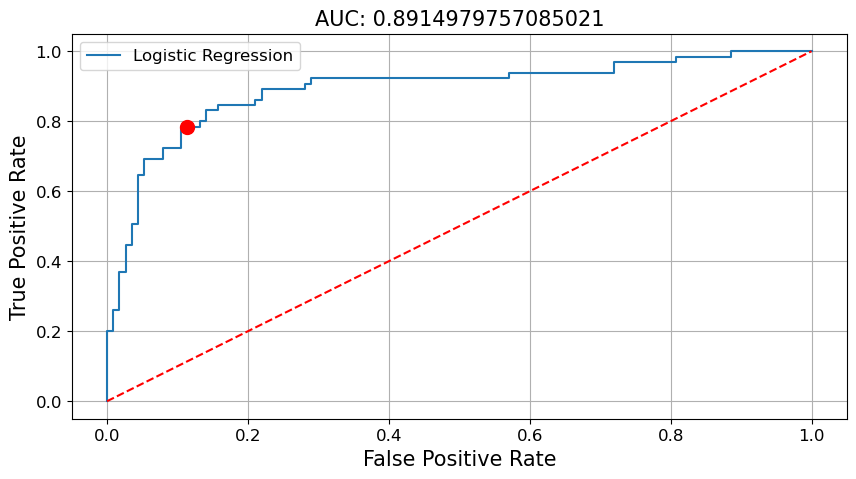

Precision-Recall Curve: Train


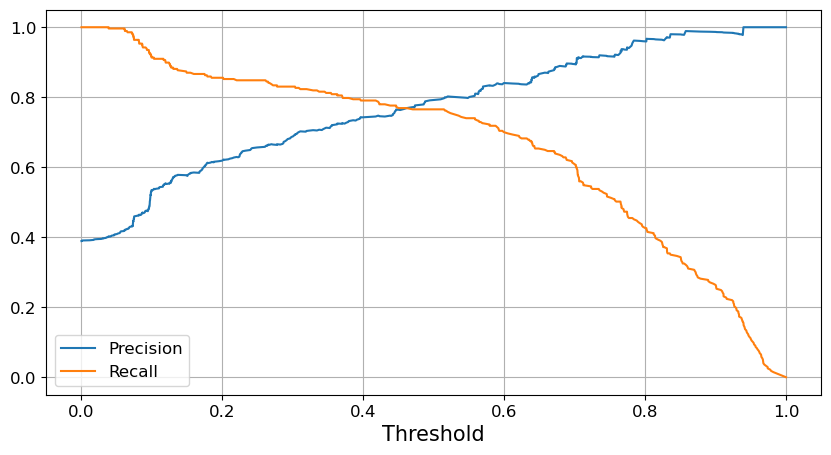

Precision-Recall Curve: Test


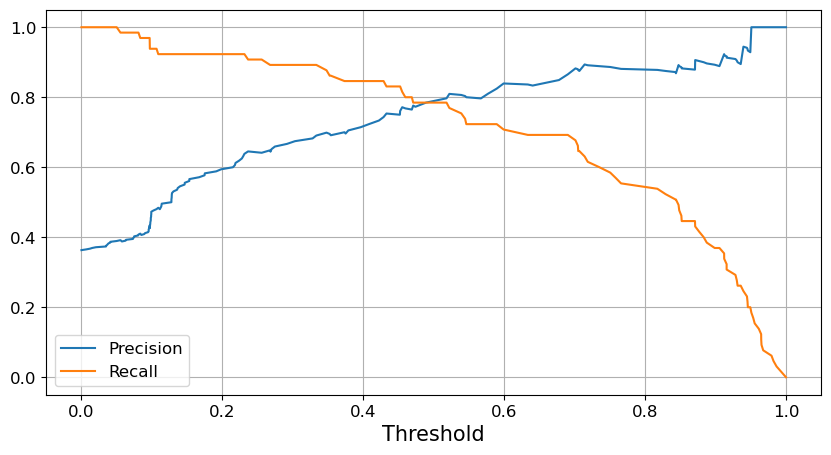

In [132]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Logistic Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)

model_logitreg = sm.Logit(Y_train, X_train_fes).fit()
display(model_logitreg.summary())

## 계수 해석
print("Effect of X..")
model_logitreg_beta = pd.DataFrame(model_logitreg.params, columns=['coef'])
display(pd.concat([model_logitreg_beta, 
                   pd.DataFrame(np.exp(model_logitreg.params), columns=['odds'])],
                   axis=1))

# 예측
P_trpred = model_logitreg.predict(X_train_fes)
P_tepred = model_logitreg.predict(X_test_fes)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Train')
display(evaluation_class_ConfusionMatrix(Y_train, P_trpred>=0.5))
print('Confusion Matrix: Test')
display(evaluation_class_ConfusionMatrix(Y_test, P_tepred>=0.5))

## Classification Report
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, P_trpred>=0.5)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, P_tepred>=0.5)

## ROC Curve & AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## Precision & Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred)
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred)

# **Summary:** 분석단계 이해도 낮은 부분 확인

**1) 데이터 핸들링**  

**2) 단계이해**  
> **(1) `Import Library`**
>
> **(2) `Data Loading`**   
>
> **(3) `Preprocessing`**   
>
> **(4) `Applying Base Algorithm`**   
>
> **(5) `Evaluation`**  

**3) 결과 해석**  

## 분석가 정의 함수

In [133]:
# 결측값 처리
def fillnull(df):
    ## Age
    df_agem = df[df.Sex == 'male']
    df_agem = df_agem[['Age']].fillna(df_agem[['Age']].mean())

    df_agefm = df[df.Sex == 'female']
    df_agefm = df_agefm[['Age']].fillna(df_agefm[['Age']].mean())
    df[['Age']] = pd.concat([df_agem, df_agefm], axis=0).sort_index()

    ## Embarked
    df[['Embarked']] = df[['Embarked']].fillna(df['Embarked'].mode()[0], axis=0)

    ## Cabin
    df['Cabin'] = df['Cabin'].str.slice(0,1)
    df['Cabin'] = df['Cabin'].fillna('Temp')
    
    return df


# 데이터 정리
def prep(df):
    # Name
    name_sub = df['Name'].str.split(',', expand=True)[1]
    name_sub = name_sub.str.split('. ', expand=True)[0]
    name_sub.replace([' Mr'], 'Mr', inplace=True)
    name_sub.replace([' Mrs'], 'Mrs', inplace=True)
    name_sub.replace([' Ms', ' Miss'], 'Miss', inplace=True)
    name_sub.replace([' Don', ' Mme', ' Lady', 'Sir', 'Mlle', ' th', ' Jonkheer'], 'Noble', inplace=True)
    name_sub.replace([' Master', ' Major', ' Col', ' Capt', ' Sir', ' Mlle'], 'Officer', inplace=True)
    name_sub.replace([' Dr', ' Rev'], 'Priest', inplace=True)
    df['Name'] = name_sub.copy()

    # Ticket
    df['Ticket'] = df['Ticket'].str.replace('.','').str.replace('/','')
    df['Ticket'] = df['Ticket'].str.strip().str.split(' ').str[0]
    df.loc[df['Ticket'].str.isdigit(), 'Ticket'] = 'NUM'

    # Age
    age_interval = [10, 20, 30, 40, 50, 60, 70, 80, 90]
    if df['Age'].max() > len(age_interval):
        df['Age'] = np.digitize(df['Age'], bins=age_interval)
        
    return df


# 데이터 분리
def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test


# 데이터 변환
def label_encoding(X_train, X_test, colname, encoder):
    X_train_le = X_train.copy()
    X_test_le = X_test.copy()
    
    for i in colname: # 대상 변수들마다
        encoder = encoder.fit(X_train[i])

        for label in X_test[i].unique():
            if label not in encoder.classes_:
                encoder.classes_ = np.append(encoder.classes_, label)

        X_train_le[i] = encoder.transform(X_train[i])
        X_test_le[i] = encoder.transform(X_test[i])
        
    return X_train_le, X_test_le


def onehot_encoding(df, colname):
    df_ohe = df.copy()
    
    for i in colname:
        if i in df.columns:
            df_ohe = pd.get_dummies(df_ohe, columns=[i], drop_first=True)
            
    return df_ohe


# 데이터 변환 후 X_train과 X_test의 변수 갯수 일치
def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()
    
    # Train & Test 변수명 체크
    X_te_noncol = [i for i in X_tr.columns if i not in X_te.columns]
    X_tr_noncol = [i for i in X_te.columns if i not in X_tr.columns]

    # 변수 갯수 일치
    if X_te_noncol != []:
        for i in X_te_noncol:
            X_te[i] = 0
            X_te = X_te[X_tr.columns].copy()
            
    if X_tr_noncol != []:
        for i in X_tr_noncol:
            X_tr[i] = 0
            X_tr = X_tr[X_te.columns].copy()
            
    return X_tr, X_te


# 스케일 조정
def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling


# Confusion Matrix 함수화
def evaluation_class_ConfusionMatrix(Y_true, Y_pred):
    conf_mat = confusion_matrix(Y_true, Y_pred)
    conf_mat = pd.DataFrame(conf_mat, 
                            index=['True: 0', 'True: 1'], 
                            columns=['Pred: 0', 'Pred: 1'])
    
    return conf_mat


# Classification Report 함수화
def evaluation_class_ClassificationReport(Y_true, Y_pred):
    print(classification_report(Y_true, Y_pred, 
                                target_names=['class 0', 'class 1']))


# ROC Curve & AUC 함수화
def evaluation_class_ROCAUC(Y_true, P_pred, figsize=(10,5)):
    fpr, tpr, thresholds = roc_curve(Y_true, P_pred)
    cm = evaluation_class_ConfusionMatrix(Y_true, P_pred>=0.5)
    recall = cm.iloc[1,1] / cm.sum(axis=1).values[1]
    fallout = cm.iloc[0,1] / cm.sum(axis=1).values[0]
    
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot([fallout], [recall], 'ro', ms=10)
    plt.title('AUC: ' + str(auc(fpr, tpr)), fontsize=15)
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid()
    plt.show()


# Precision & Recall Curve 함수화
def evaluation_class_PrecisionRecall(Y_true, P_pred, figsize=(10,5)):
    pre, rec, thresholds = precision_recall_curve(Y_true, P_pred)
    
    plt.figure(figsize=figsize)
    plt.plot(thresholds, pre[:-1], label='Precision')
    plt.plot(thresholds, rec[1:], label='Recall')
    plt.xlabel('Threshold', fontsize=15)
    plt.ylabel('', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid()
    plt.show()

## 전처리 미반영 분석결과

(712, 11) (712, 1)
(179, 11) (179, 1)
Optimization terminated successfully.
         Current function value: 0.576595
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            6
Date:                Sat, 01 Mar 2025   Pseudo R-squ.:                  0.1372
Time:                        22:34:30   Log-Likelihood:                -410.54
converged:                       True   LL-Null:                       -475.84
Covariance Type:            nonrobust   LLR p-value:                 9.539e-26
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.9349      0.481      6.101      0.000       1.992       3.878
PassengerId    -0.0002      0.000     -0.647      0.518      -0.001       0.000
Pclass         -0.9736      0.136     -7.138      0.000      -1.241      -0.706
Age            -0.4475      0.073     -6.131      0.000      -0.591      -0.304
SibSp          -0.2564      0.101     -2.546      0.011      -0.454      -0.059
Parch           0.2682      0.121      2.213      0.027       0.031       0.506
Fare            0.0031      0.002      1.257      0.209      -0.002       0.008
===============================================================================
"""

Effect of X..


,coef,odds
const,2.93,18.82
PassengerId,-0.00,1.00
Pclass,-0.97,0.38
Age,-0.45,0.64
SibSp,-0.26,0.77
Parch,0.27,1.31
Fare,0.00,1.00


Confusion Matrix: Train


,Pred: 0,Pred: 1
True: 0,368,67
True: 1,145,132


Confusion Matrix: Test


,Pred: 0,Pred: 1
True: 0,92,22
True: 1,29,36


Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.72      0.85      0.78       435
     class 1       0.66      0.48      0.55       277

    accuracy                           0.70       712
   macro avg       0.69      0.66      0.67       712
weighted avg       0.70      0.70      0.69       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.76      0.81      0.78       114
     class 1       0.62      0.55      0.59        65

    accuracy                           0.72       179
   macro avg       0.69      0.68      0.68       179
weighted avg       0.71      0.72      0.71       179

ROC Curve: Train


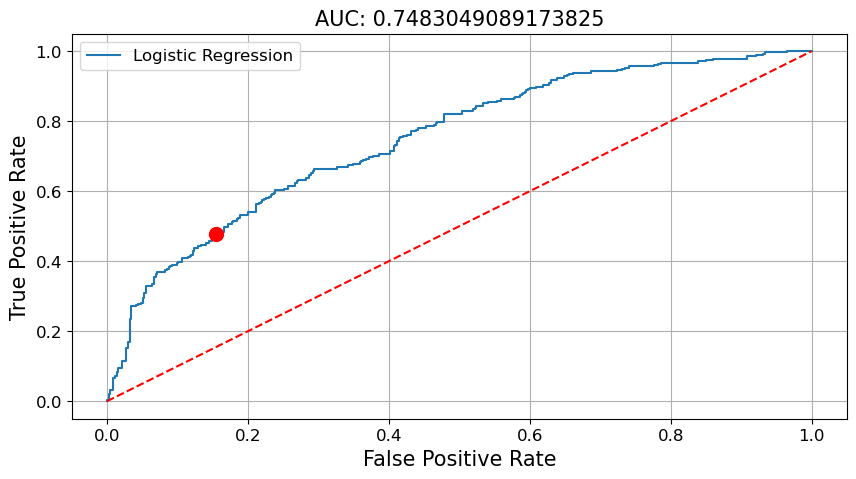

ROC Curve: Test


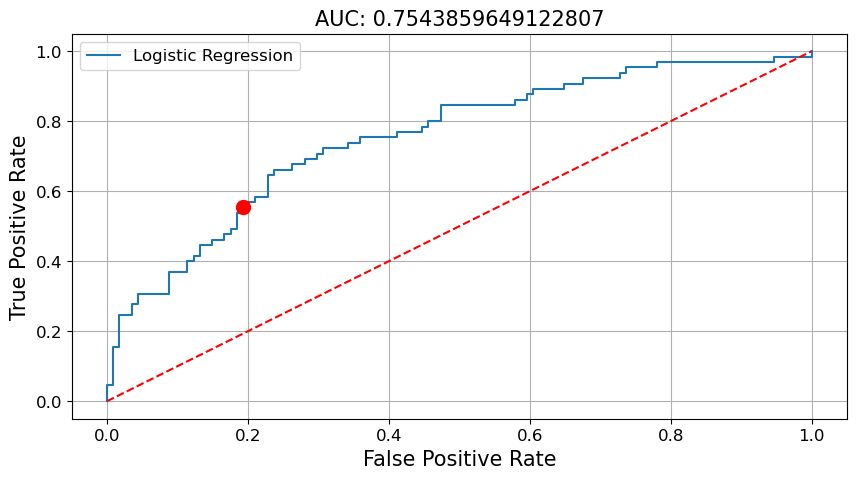

Precision-Recall Curve: Train


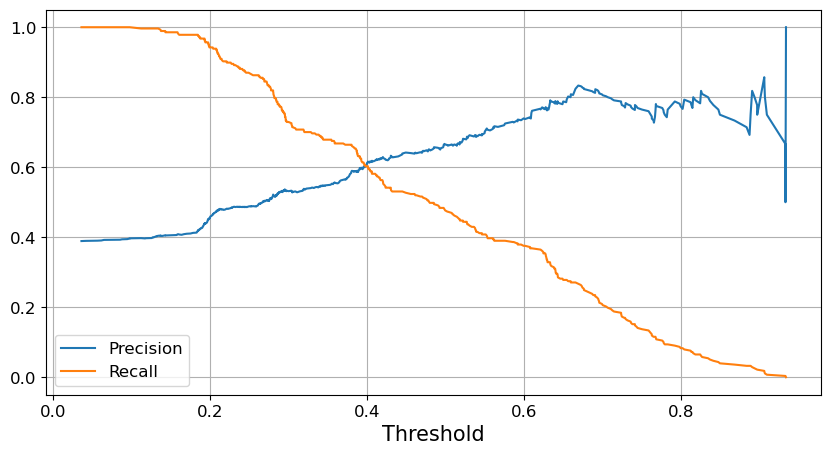

Precision-Recall Curve: Test


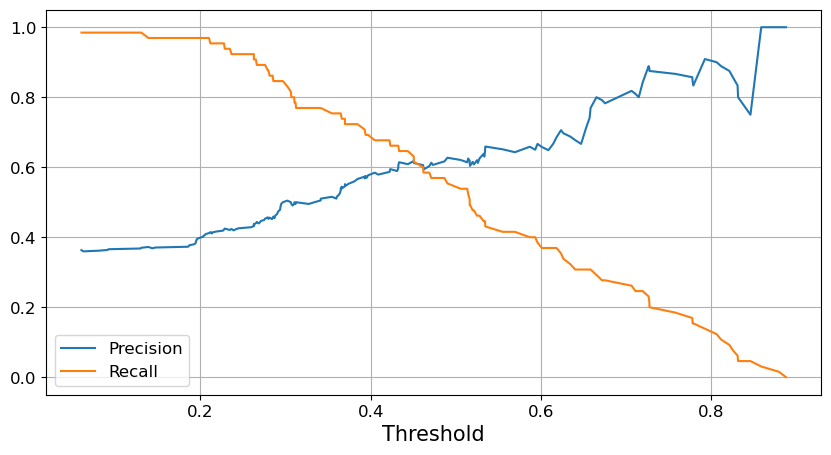

In [134]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

###
X_train_fes = X_train[X_train.columns[X_train.dtypes != 'object']]
X_test_fes = X_test[X_test.columns[X_test.dtypes != 'object']]
###

# label_colname = ['Sex', 'Cabin', 'Ticket']
# encoder = preprocessing.LabelEncoder()
# X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

# onehot_colname = ['Name', 'Embarked']
# X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
# X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
# X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

# scaler = preprocessing.MinMaxScaler()
# X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Logistic Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)

model_logitreg = sm.Logit(Y_train, X_train_fes).fit()
display(model_logitreg.summary())

## 계수 해석
print("Effect of X..")
model_logitreg_beta = pd.DataFrame(model_logitreg.params, columns=['coef'])
display(pd.concat([model_logitreg_beta, 
                   pd.DataFrame(np.exp(model_logitreg.params), columns=['odds'])],
                   axis=1))

# 예측
P_trpred = model_logitreg.predict(X_train_fes)
P_tepred = model_logitreg.predict(X_test_fes)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Train')
display(evaluation_class_ConfusionMatrix(Y_train, P_trpred>=0.5))
print('Confusion Matrix: Test')
display(evaluation_class_ConfusionMatrix(Y_test, P_tepred>=0.5))

## Classification Report
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, P_trpred>=0.5)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, P_tepred>=0.5)

## ROC Curve & AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## Precision & Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred)
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred)

## 전처리 모두 반영 분석결과

(712, 11) (712, 1)
(179, 11) (179, 1)
Optimization terminated successfully.
         Current function value: 0.414285
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                           16
Date:                Sat, 01 Mar 2025   Pseudo R-squ.:                  0.3801
Time:                        22:34:31   Log-Likelihood:                -294.97
converged:                       True   LL-Null:                       -475.84
Covariance Type:            nonrobust   LLR p-value:                 3.668e-67
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.7321      0.649      5.754      0.000       2.461       5.003
PassengerId     -0.0320      0.365     -0.088      0.930      -0.747       0.683
Pclass          -1.9552      0.409     -4.776      0.000      -2.758      -1.153
Sex           -167.8069   1.49e+07  -1.12e-05      1.000   -2.93e+07    2.93e+07
Age             -2.4841      0.762     -3.262      0.001      -3.977      -0.991
SibSp           -4.1017      1.107     -3.705      0.000      -6.272      -1.932
Parch           -1.4440      0.766     -1.886      0.059      -2.945       0.057
Ticket           0.3358      0.669      0.502      0.616      -0.976       1.647
Fare             1.2815      1.345      0.953      0.341      -1.355       3.918
Cabin           -0.4171      0.508     -0.822      0.411      -1.412       0.578
Name_Mr        165.0223   1.49e+07    1.1e-05      1.000   -2.93e+07    2.93e+07
Name_Mrs         0.8312      0.383      2.169      0.030       0.080       1.582
Name_Noble      61.7478   3.46e+22   1.78e-21      1.000   -6.79e+22    6.79e+22
Name_Officer   168.1782   1.49e+07   1.13e-05      1.000   -2.93e+07    2.93e+07
Name_Priest    164.3790   1.49e+07    1.1e-05      1.000   -2.93e+07    2.93e+07
Embarked_Q       0.0129      0.436      0.030      0.976      -0.841       0.867
Embarked_S      -0.2858      0.282     -1.012      0.312      -0.839       0.268
================================================================================
"""

Effect of X..


,coef,odds
const,3.73,41.77
PassengerId,-0.03,0.97
Pclass,-1.96,0.14
Sex,-167.81,0.00
Age,-2.48,0.08
SibSp,-4.10,0.02
Parch,-1.44,0.24
Ticket,0.34,1.40
Fare,1.28,3.60
Cabin,-0.42,0.66


Confusion Matrix: Train


,Pred: 0,Pred: 1
True: 0,380,55
True: 1,65,212


Confusion Matrix: Test


,Pred: 0,Pred: 1
True: 0,101,13
True: 1,14,51


Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.85      0.87      0.86       435
     class 1       0.79      0.77      0.78       277

    accuracy                           0.83       712
   macro avg       0.82      0.82      0.82       712
weighted avg       0.83      0.83      0.83       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.89      0.88       114
     class 1       0.80      0.78      0.79        65

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

ROC Curve: Train


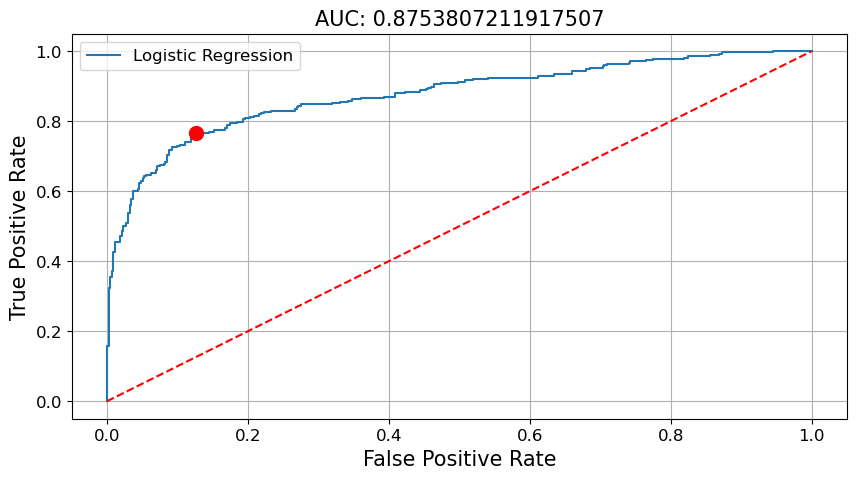

ROC Curve: Test


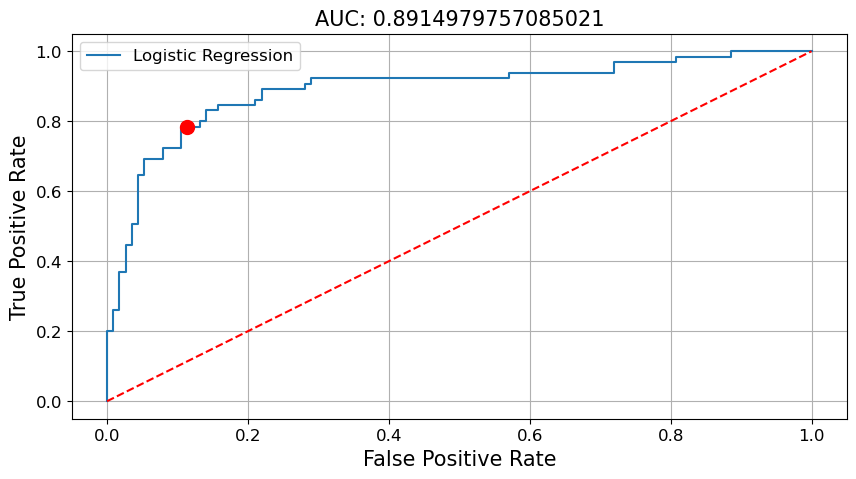

Precision-Recall Curve: Train


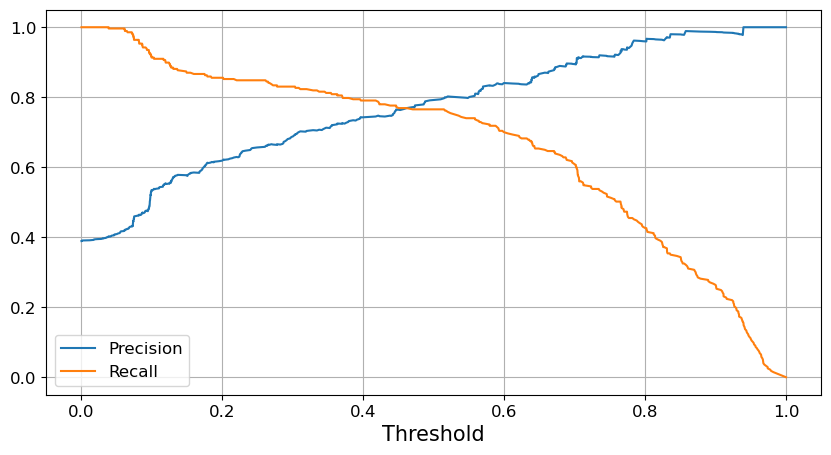

Precision-Recall Curve: Test


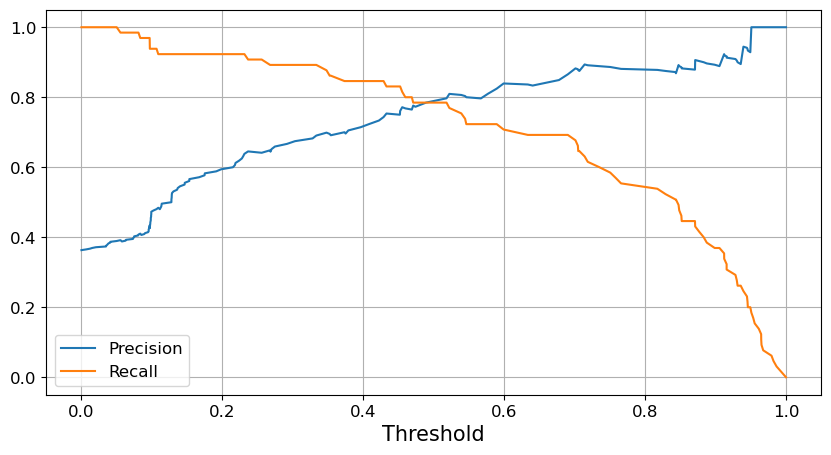

In [135]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Logistic Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)

model_logitreg = sm.Logit(Y_train, X_train_fes).fit()
display(model_logitreg.summary())

## 계수 해석
print("Effect of X..")
model_logitreg_beta = pd.DataFrame(model_logitreg.params, columns=['coef'])
display(pd.concat([model_logitreg_beta, 
                   pd.DataFrame(np.exp(model_logitreg.params), columns=['odds'])],
                   axis=1))

# 예측
P_trpred = model_logitreg.predict(X_train_fes)
P_tepred = model_logitreg.predict(X_test_fes)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Train')
display(evaluation_class_ConfusionMatrix(Y_train, P_trpred>=0.5))
print('Confusion Matrix: Test')
display(evaluation_class_ConfusionMatrix(Y_test, P_tepred>=0.5))

## Classification Report
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, P_trpred>=0.5)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, P_tepred>=0.5)

## ROC Curve & AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## Precision & Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred)
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred)